In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from ipywidgets import interact, IntSlider, FloatSlider, fixed
from astropy.convolution import convolve, Box1DKernel, Gaussian1DKernel

In [2]:
%matplotlib inline

In [3]:
plt.style.use('court.mplstyle')

In [291]:
highmass_rc_newvals = pd.read_csv('../datatables/highmass_rc_newvals.csv')
highmass_rc_newvals

KIC  numax  pysyd_numax  e_pysyd_numax  new_numax  smooth_numax  \
0     3347458  39.99    40.291621       0.904390      40.32     41.422682   
1     8378545  48.82    47.769061       1.989659      48.07     48.952072   
2     5978324  49.10    48.776551       0.974408      48.78     50.072904   
3    10068490  66.42    58.662513       1.977989      58.84     60.906533   
4     4756133  80.81    80.362852       2.357250      80.29     83.967767   
..        ...    ...          ...            ...        ...           ...   
110  10162765  88.56    85.502602       2.118024      85.53     89.092562   
111   3430048  35.82    33.626875       2.147042      33.63     37.856607   
112   7116721  50.86    50.988298       1.581224      50.97     53.768334   
113   7347076  90.59    90.713242       1.757715      90.65     94.236618   
114  10163776  76.00    74.766567       2.322241      74.77     79.174323   

     Delnu  pysyd_dnu  e_pysyd_dnu  o_Teff  ...  L_[Fe/H]  L_[Fe/H]_e  \
0    3.360   3.362861     0.016179    5000  ...       NaN         NaN   
1    3.952   3.966159     0.022203    5058  ...     0.323       0.030   
2    4.024   4.072667     0.016443    5051  ...       NaN         NaN   
3    5.206   5.239133     0.046630    5189  ...    -0.216       0.035   
4    5.865   5.998605     0.022750    5152  ...       NaN         NaN   
..     ...        ...          ...     ...  ...       ...         ...   
110  6.760   6.801791     0.023959    4948  ...     0.085       0.018   
111  3.487   3.518327     0.034631    5079  ...       NaN         NaN   
112  4.522   4.514956     0.013743    5028  ...     0.049       0.025   
113  7.216   7.217619     0.034534    5386  ...    -0.007       0.044   
114  6.165   6.166957     0.029330    5106  ...    -0.083       0.022   

     Teff_adopt  Teff_e_adopt  log(g)_adopt  log(g)_e_adopt  feh_adopt  \
0      4863.000     84.000000        2.5250        0.039000     0.1650   
1      4984.000     43.591857        2.9515        0.118829     0.2400   
2      5051.000     92.000000        2.7010        0.050000    -0.0980   
3      5241.375     51.090728        2.7340        0.127322    -0.2085   
4      5186.000     95.000000        3.0140        0.056000     0.0910   
..          ...           ...           ...             ...        ...   
110    5067.945     46.560283        2.9160        0.095395     0.0805   
111    4838.000     84.000000        2.5020        0.039000     0.1060   
112    4798.390     26.510000        2.6770        0.044000     0.0490   
113    5076.470     46.210000        2.9150        0.076000    -0.0070   
114    5092.255     53.562487        2.7475        0.104911    -0.0595   

     feh_e_adopt  adopt_flag  adopt_flag_int  
0       0.007000      apogee               1  
1       0.086673         avg               0  
2       0.008000      apogee               1  
3       0.093675         avg               0  
4       0.008000      apogee               1  
..           ...         ...             ...  
110     0.067201         avg               0  
111     0.007000      apogee               1  
112     0.025000      lamost               2  
113     0.044000      lamost               2  
114     0.074330         avg               0  

[115 rows x 48 columns]

In [5]:
highmass_rc = pd.read_csv('../datatables/highmass_rc_werr.csv')
highmass_rc

KIC  Kpmag  QLen    DLen  numax  e_numax  Delnu  e_Delnu     A  \
0     3347458  10.30    17  1235.8  39.99     1.77  3.360    0.020  39.7   
1     8378545  11.78    17  1235.5  48.82     4.01  3.977    0.040  23.0   
2     5978324  10.96    18  1318.1  49.10     0.80  4.074    0.023  23.5   
3    10068490  12.26    18  1317.7  66.42     5.52  5.206    0.076  13.7   
4     4756133  10.58    14   974.9  80.81     2.22  5.994    0.030  19.9   
..        ...    ...   ...     ...    ...      ...    ...      ...   ...   
110  10162765  11.12    15  1055.8  88.56     1.62  6.795    0.032  21.1   
111   3430048  12.06     8   557.6  35.82     1.05  3.487    0.095  62.5   
112   7116721  13.38    18  1317.9  50.86     1.45  4.522    0.017  48.4   
113   7347076  13.66    17  1308.5  90.59     2.34  7.216    0.045  23.6   
114  10163776  11.46    15  1055.8  76.00     2.01  6.165    0.041  27.7   

     Width  ...  e_RGBcorR  ClcorM  e_ClcorM  ClcorR  e_ClcorR  Phase  M17  \
0     17.4  ...       1.05    5.24      0.78   20.87      1.06      2  M17   
1     22.9  ...       1.57    4.90      1.24   18.21      1.57      2  M17   
2     17.6  ...       0.45    4.70      0.33   17.78      0.46      2  M17   
3     19.1  ...       1.32    4.61      1.20   15.04      1.35      2  M17   
4     31.3  ...       0.45    4.51      0.43   13.51      0.45      2  M17   
..     ...  ...        ...     ...       ...     ...       ...    ...  ...   
110   33.4  ...       0.29    3.02      0.23   10.67      0.29      2  M17   
111   17.1  ...       1.09    3.01      0.45   16.64      1.08      2  M17   
112   20.8  ...       0.49    3.01      0.31   14.00      0.50      2  M17   
113   25.8  ...       0.37    3.01      0.30   10.32      0.37      2  M17   
114   25.5  ...       0.39    3.01      0.29   11.40      0.39      2  M17   

     Simbad        _RA        _DE  
0    Simbad  292.77283  38.432480  
1    Simbad  296.26709  44.371861  
2    Simbad  296.65195  41.222080  
3    Simbad  289.05295  47.040981  
4    Simbad  294.38312  39.844940  
..      ...        ...        ...  
110  Simbad  298.81076  47.142471  
111  Simbad  287.31088  38.598862  
112  Simbad  291.45297  42.617050  
113  Simbad  286.28159  42.939899  
114  Simbad  299.09705  47.142738  

[115 rows x 36 columns]

In [6]:
def read_star_hp(star_name,suppress_output=True,unpack=False):
    delta_nu = highmass_rc_newvals['pysyd_dnu'][highmass_rc_newvals['KIC']==float(star_name[4:])].values[0]
    nu_max = highmass_rc_newvals['pysyd_numax'][highmass_rc_newvals['KIC']==float(star_name[4:])].values[0]
    if suppress_output == False:
        print(star_name)
        print('delta_nu =',delta_nu)
        print('nu_max =',nu_max)
    
    lightcurve = pd.read_csv('../data/hpfiltered_LCs/KIC'+star_name[4:]+'_LC.csv')
    powerspec = pd.read_csv('../data/hpfiltered_LCs/KIC'+star_name[4:]+'_PS.csv')
    if unpack == True:
        if suppress_output == False:
            print('unpacking data frames')
        time = np.asarray(lightcurve['time'])
        flux = np.asarray(lightcurve['flux'])
        freq = np.asarray(powerspec['freq'])
        power = np.asarray(powerspec['power'])
        amp = np.asarray(powerspec['amp'])
        return delta_nu,nu_max,time,flux,freq,power,amp
    else:
        if suppress_output == False:
            print('returning dataframes')
        return delta_nu,nu_max,lightcurve,powerspec

In [7]:
def read_star_bdps(star_name,suppress_output=True,unpack=False):
    delta_nu = highmass_rc_newvals['pysyd_dnu'][highmass_rc_newvals['KIC']==float(star_name[4:])].values[0]
    nu_max = highmass_rc_newvals['pysyd_numax'][highmass_rc_newvals['KIC']==float(star_name[4:])].values[0]
    if suppress_output == False:
        print(star_name)
        print('delta_nu =',delta_nu)
        print('nu_max =',nu_max)
    
    lightcurve = pd.read_csv('../data/hpfiltered_LCs/KIC'+star_name[4:]+'_LC.csv')
    powerspec = pd.read_csv('../data/pysyd_bdps/'+star_name[4:]+'_BDPS.txt', 
                            delimiter='\s+', names=['freq','power'])
    if unpack == True:
        if suppress_output == False:
            print('unpacking data frames')
        time = np.asarray(lightcurve['time'])
        flux = np.asarray(lightcurve['flux'])
        freq = np.asarray(powerspec['freq'])
        power = np.asarray(powerspec['power'])
        amp = np.asarray(powerspec['amp'])
        return delta_nu,nu_max,time,flux,freq,power,amp
    else:
        if suppress_output == False:
            print('returning dataframes')
        return delta_nu,nu_max,lightcurve,powerspec

In [8]:
def yl_echelle(x, y, period, fmin=None, fmax=None, echelletype="single", offset=0.0):
    '''
    Make an echelle plot used in asteroseismology.
    
    Input parameters
    ----
    x: 1d array-like, freq
    y: 1d array-like, power spectrum
    period: float, length of each vertical stack (Dnu in a frequency echelle, DPi in a period echelle)
    fmin: float, minimum frequency to be plotted
    fmax: float, maximum frequency to be plotted
    echelletype: str, `single` or `replicated`
    offset: float, an amount by which the diagram is shifted horizontally
    
    Return
    ----
    z: a 2d numpy.array, folded power spectrum
    extent: a list, edges (left, right, bottom, top) 
    
    Users can create an echelle diagram with the following command:
    ----
    
    import matplotlib.pyplot as plt
    z, ext = echelle(freq, power, Dnu, fmin=numax-4*Dnu, fmax=numax+4*Dnu)
    plt.imshow(z, extent=ext, aspect='auto', interpolation='nearest')
    
    '''
    
    if fmin is None: fmin=0.
    if fmax is None: fmax=np.nanmax(x)

    fmin = fmin - offset
    fmax = fmax - offset
    x = x - offset

    fmin = 0.0 if fmin<0. else fmin - (fmin % period)

    # define plotting elements
    resolution = np.median(np.diff(x))
    # number of vertical stacks
    n_stack = int((fmax-fmin)/period) 
    # number of point per stack
    n_element = int(period/resolution) 

    fstart = fmin - (fmin % period)
    
    z = np.zeros([n_stack, n_element])
    base = np.linspace(0, period, n_element) if echelletype=='single' else np.linspace(0, 2*period, n_element)
    for istack in range(n_stack):
        z[-istack-1,:] = np.interp(fmin+istack*period+base, x, y)
    
    extent = (0, period, fstart, fstart+n_stack*period) if echelletype=='single' else (0, 2*period, fstart, fstart+n_stack*period)
        
    return z, extent

In [9]:
def echelle_wrapper(freq,power,dnu,fmin,fmax,smooth_percent=0.02):
    fig,ax = plt.subplots(figsize=(8,8))
#     ax1 = fig.add_subplot(111)
    freq_res = np.median(np.diff(freq))
    power = convolve(power, Box1DKernel((dnu*smooth_percent)/freq_res))
#     z, ext = yl_echelle(freq,power,dnu,fmin,fmax, echelletype="replicated")
    z, ext = yl_echelle(freq, power, dnu, fmin=fmin, fmax=fmax, echelletype="replicated")
    z = np.sqrt(z) #sqrt scaling
    ax.imshow(z, extent=ext, aspect='auto', interpolation='nearest', cmap='BuPu')
#     ax.imshow(echz,aspect="auto",
#               extent=(echx.min(), echx.max(), echy.min(), echy.max()),
#               origin="lower",cmap='BuPu')
    ax.axvline(dnu,color='grey',linestyle='--',alpha=0.5)
    ax.set_xlabel("Frequency mod "+str("{0:.3f}").format(dnu) + " ($\mu$Hz)")

KIC 3347458
delta_nu = 3.362860546
nu_max = 40.29162051
returning dataframes


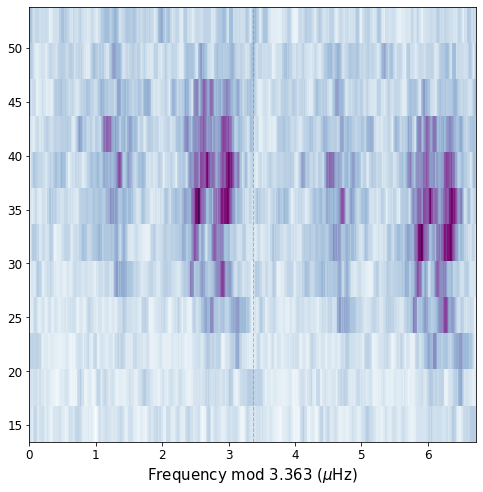

KIC 8378545
delta_nu = 3.966159149
nu_max = 47.76906119
returning dataframes


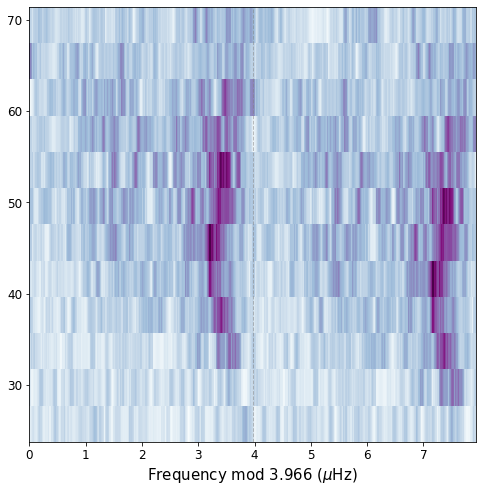

KIC 5978324
delta_nu = 4.072666568
nu_max = 48.77655086
returning dataframes


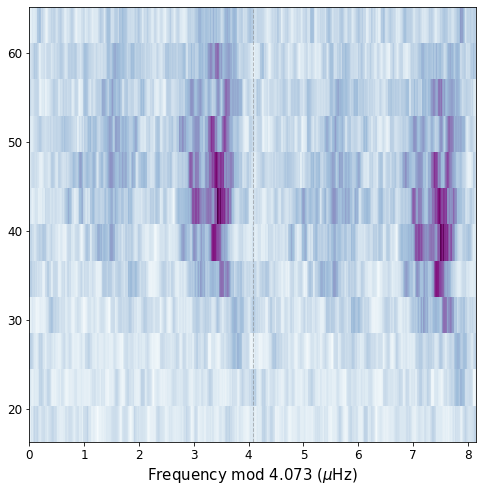

KIC 10068490
delta_nu = 5.239133186
nu_max = 58.662513
returning dataframes


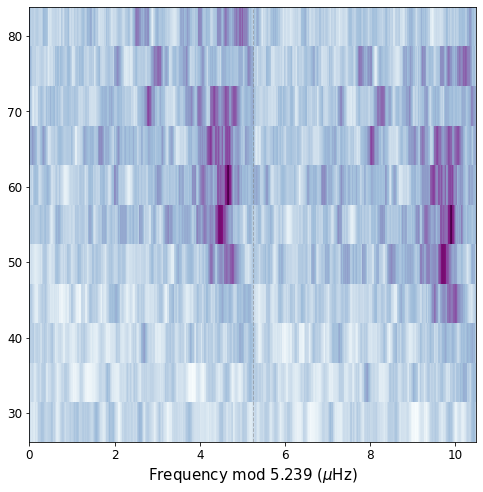

KIC 4756133
delta_nu = 5.998605309
nu_max = 80.36285179
returning dataframes


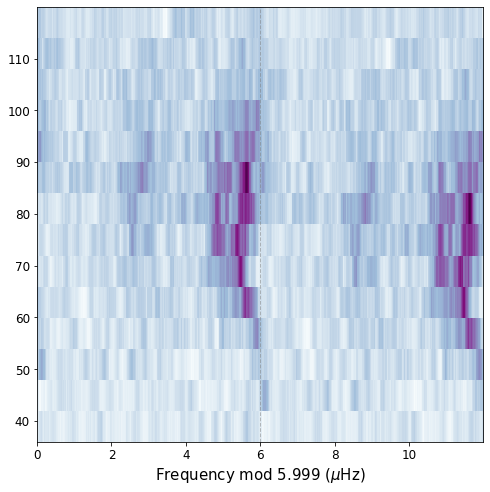

KIC 7175316
delta_nu = 3.730428817
nu_max = 41.48800726
returning dataframes


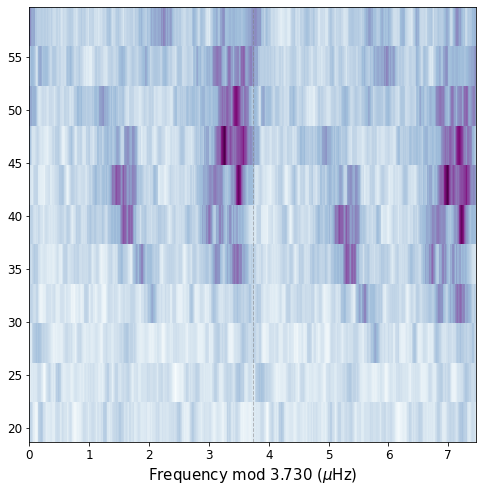

KIC 7024018
delta_nu = 6.639096698
nu_max = 80.55175094
returning dataframes


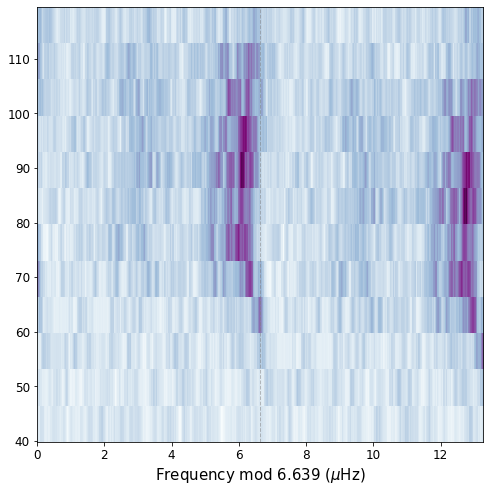

KIC 6547176
delta_nu = 4.086520875
nu_max = 43.03859571
returning dataframes


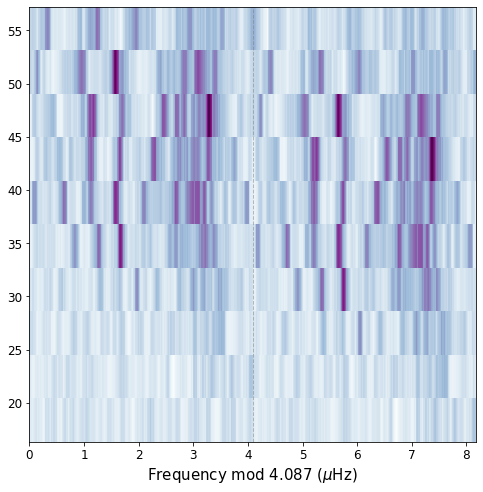

KIC 8621290
delta_nu = 5.425330358
nu_max = 64.8569874
returning dataframes


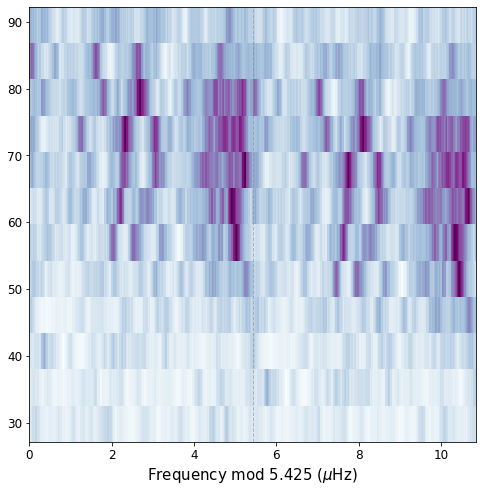

KIC 10384595
delta_nu = 4.764084258
nu_max = 47.58802372
returning dataframes


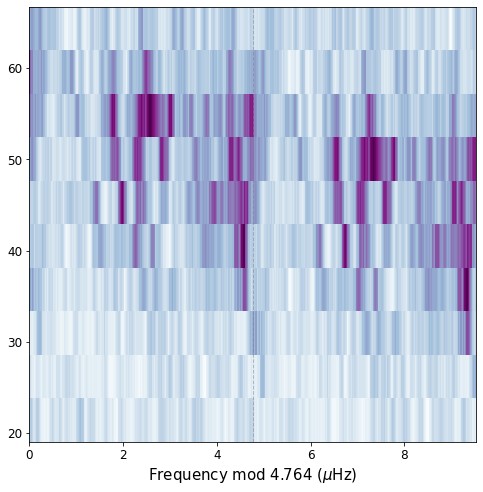

KIC 6599955
delta_nu = 5.870093442
nu_max = 75.7110906
returning dataframes


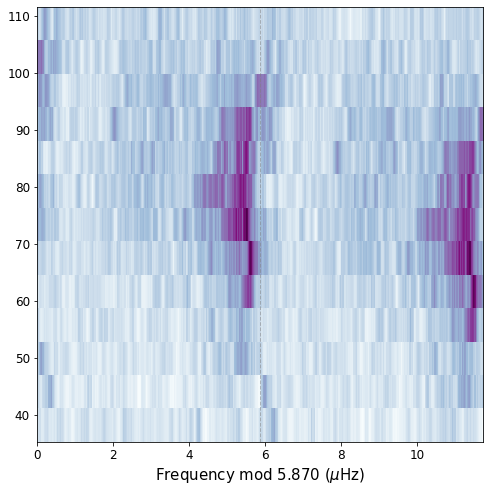

KIC 3955502
delta_nu = 2.516170954
nu_max = 24.71456259
returning dataframes


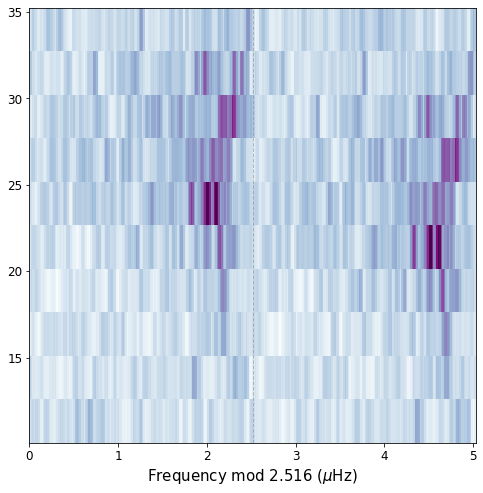

KIC 8037930
delta_nu = 4.776809297
nu_max = 54.42168115
returning dataframes


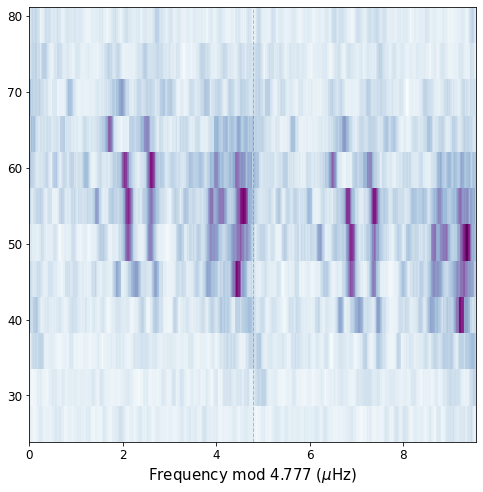

KIC 8569885
delta_nu = 4.024211373
nu_max = 44.92763217
returning dataframes


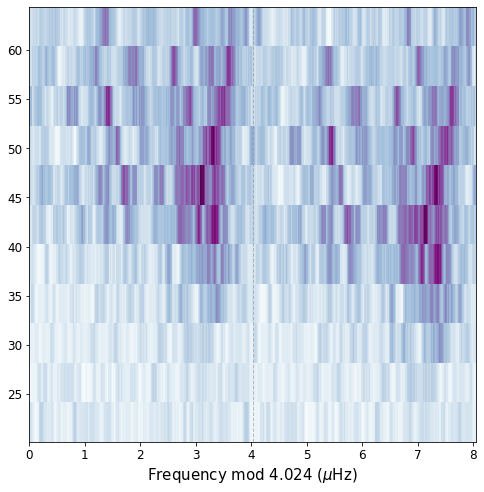

KIC 3747623
delta_nu = 4.317942932
nu_max = 29.27027048
returning dataframes


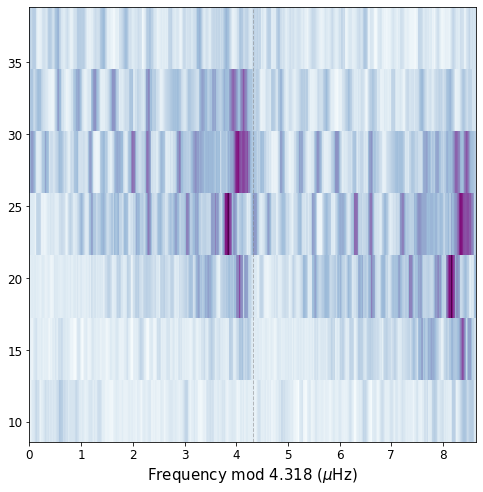

KIC 6529078
delta_nu = 3.977589767
nu_max = 31.84270529
returning dataframes


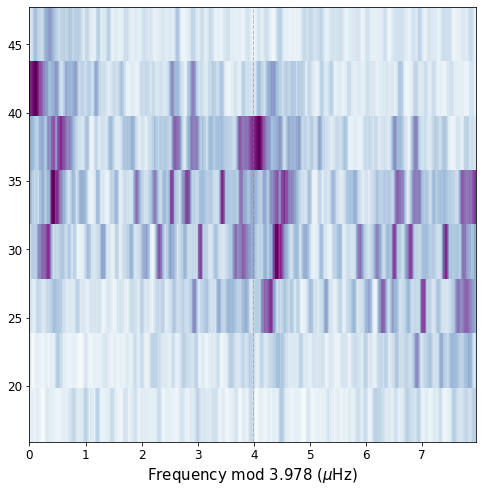

KIC 11518639
delta_nu = 4.610576558
nu_max = 56.14959081
returning dataframes


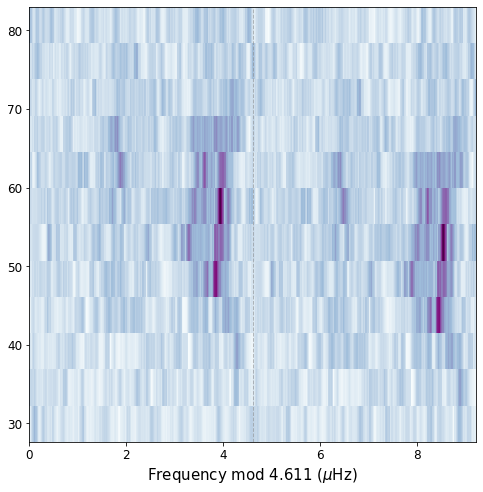

KIC 7988900
delta_nu = 4.127937976
nu_max = 47.73757795
returning dataframes


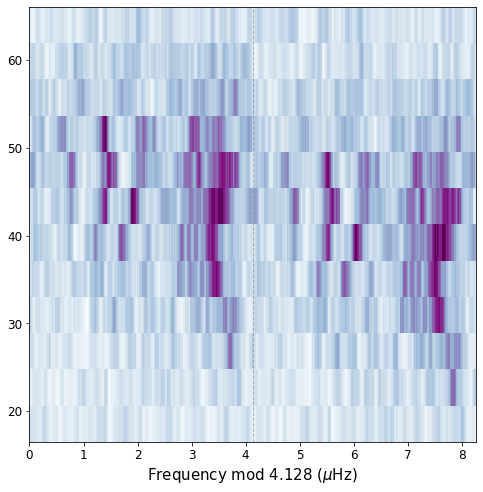

KIC 8365782
delta_nu = 6.298076484
nu_max = 78.48954909
returning dataframes


KIC 9612933
delta_nu = 4.432696858
nu_max = 52.46804315
returning dataframes


KIC 7971558
delta_nu = 2.877087941
nu_max = 28.10731901
returning dataframes


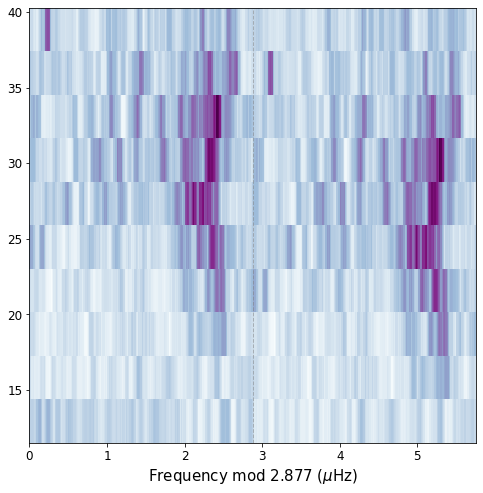

KIC 10547065
delta_nu = 3.790061265
nu_max = 40.83524324
returning dataframes


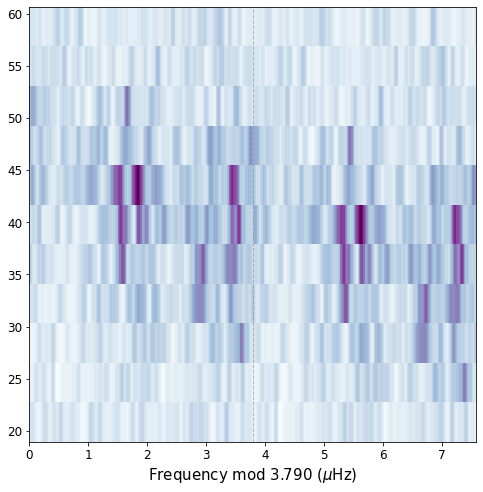

KIC 10094550
delta_nu = 4.844474207
nu_max = 56.47437803
returning dataframes


KIC 10736390
delta_nu = 5.80222533
nu_max = 71.81494249
returning dataframes


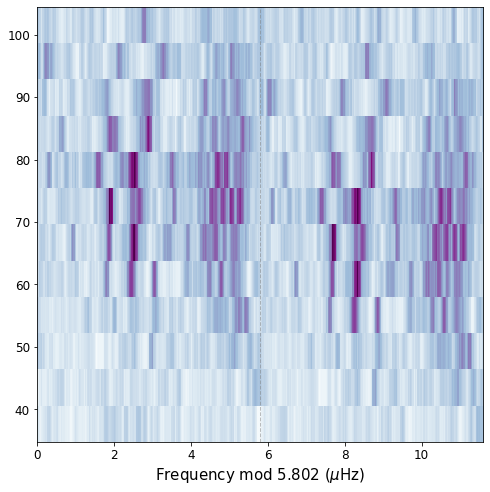

KIC 3758458
delta_nu = 5.875083557
nu_max = 67.04513044
returning dataframes


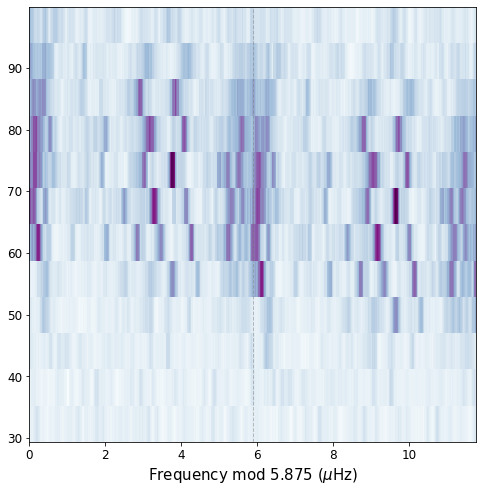

KIC 5564131
delta_nu = 3.631712456
nu_max = 37.89449266
returning dataframes


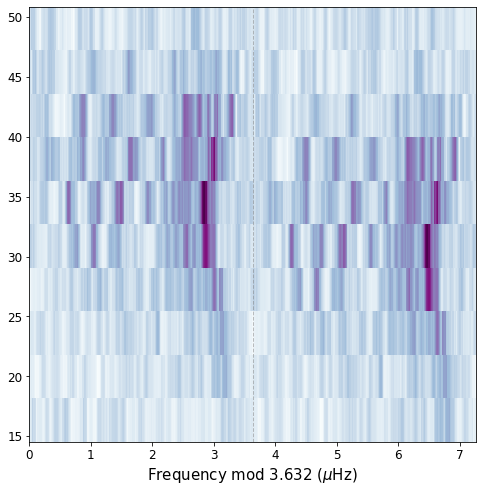

KIC 4370592
delta_nu = 4.420424226
nu_max = 50.02689728
returning dataframes


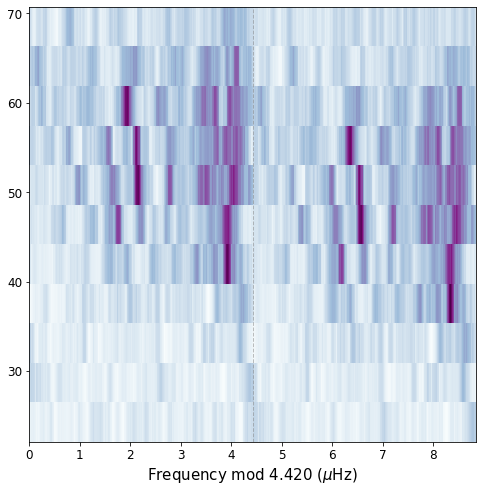

KIC 5097690
delta_nu = 4.989400844
nu_max = 59.04032742
returning dataframes


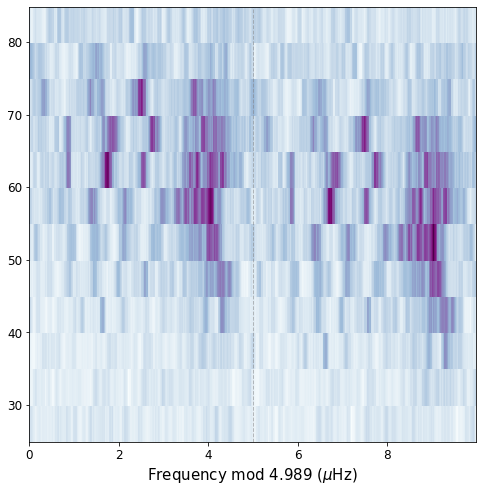

KIC 9286851
delta_nu = 6.627442492
nu_max = 85.49473209
returning dataframes


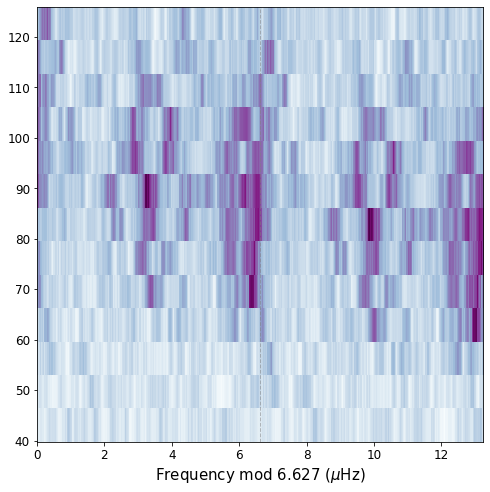

KIC 6866251
delta_nu = 7.199573895
nu_max = 94.23153966
returning dataframes


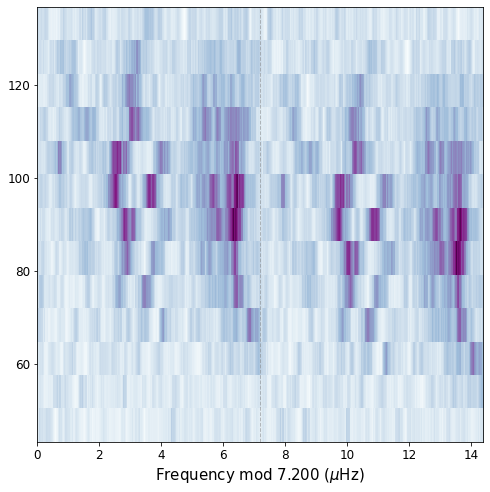

KIC 5106376
delta_nu = 5.191475262
nu_max = 61.69285281
returning dataframes


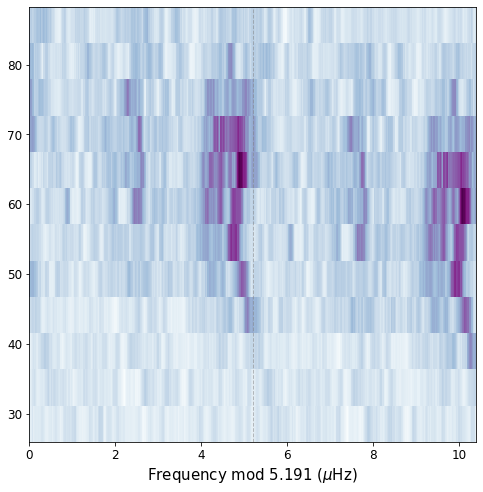

KIC 4562675
delta_nu = 5.40343515
nu_max = 65.28202648
returning dataframes


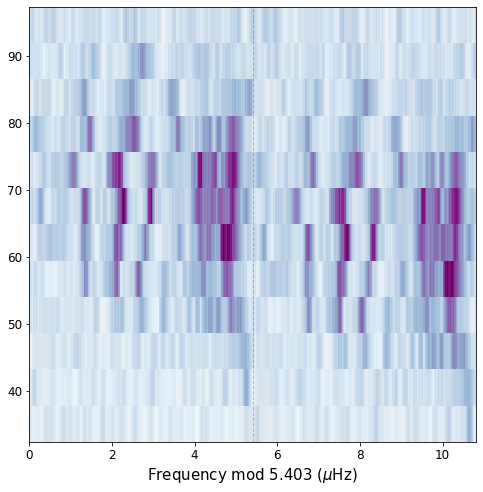

KIC 8525150
delta_nu = 5.660189659
nu_max = 71.68901144
returning dataframes


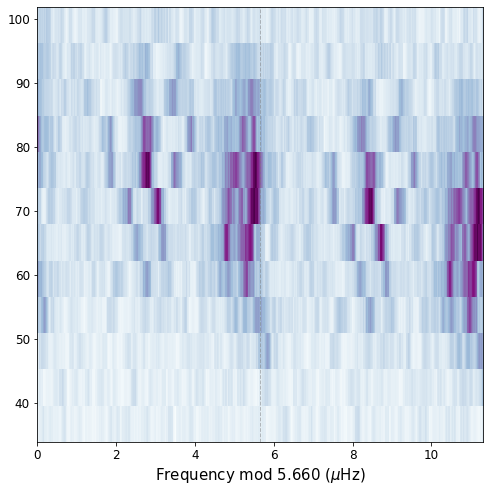

KIC 5631956
delta_nu = 4.774833095
nu_max = 49.4613275
returning dataframes


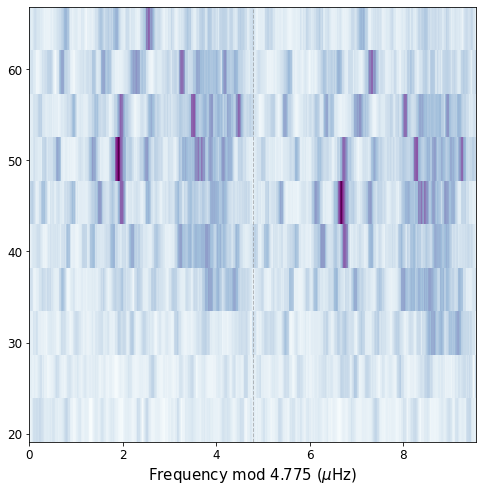

KIC 9245283
delta_nu = 3.866352639
nu_max = 42.31446186
returning dataframes


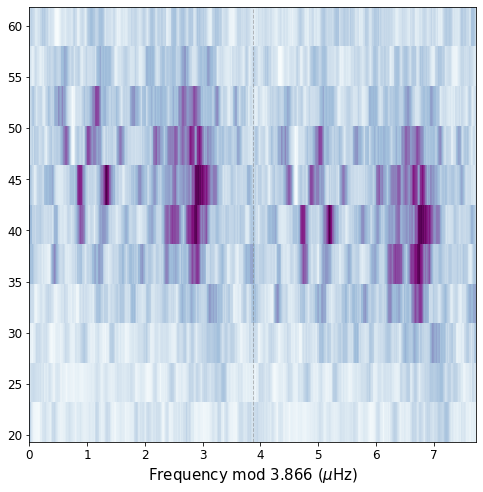

KIC 4059250
delta_nu = 5.018749079
nu_max = 57.23787078
returning dataframes


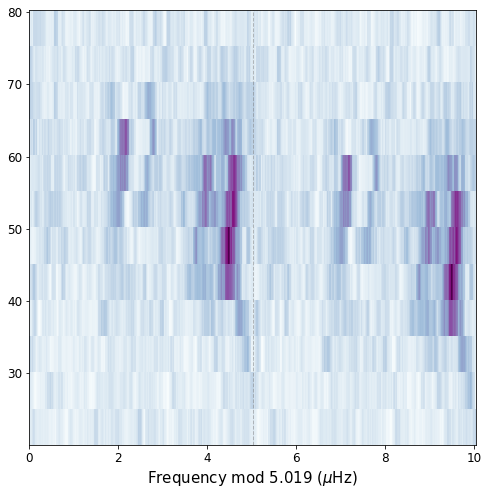

KIC 10322513
delta_nu = 7.174200746
nu_max = 92.29526485
returning dataframes


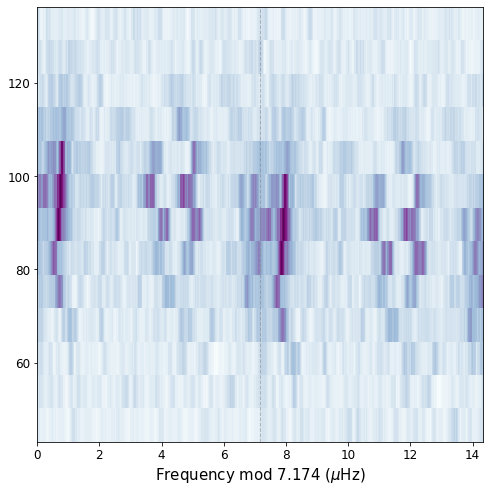

KIC 3120567
delta_nu = 5.419966961
nu_max = 65.17183398
returning dataframes


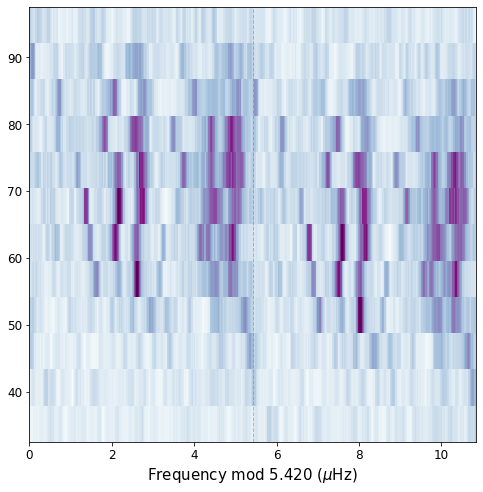

KIC 11234897
delta_nu = 5.189995261
nu_max = 58.85928554
returning dataframes


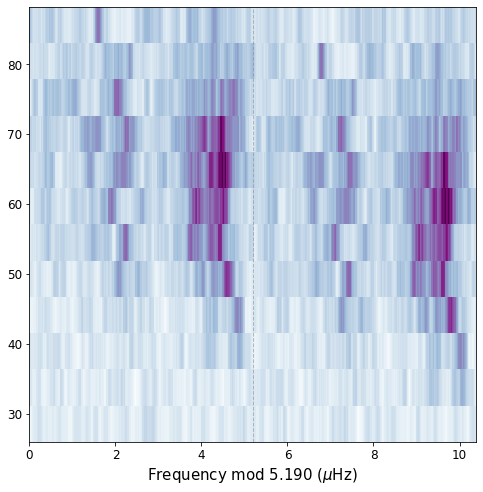

KIC 11297585
delta_nu = 3.31135704
nu_max = 33.75868941
returning dataframes


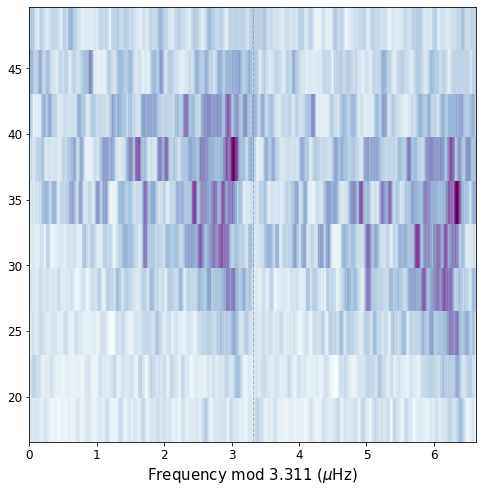

KIC 4940439
delta_nu = 5.798200854
nu_max = 72.23998574
returning dataframes


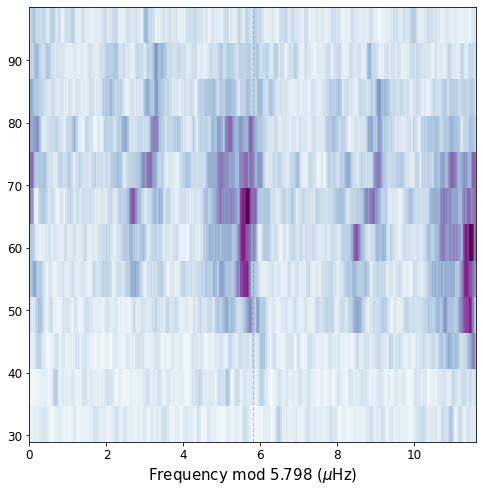

KIC 5307930
delta_nu = 4.472398231
nu_max = 51.20868891
returning dataframes


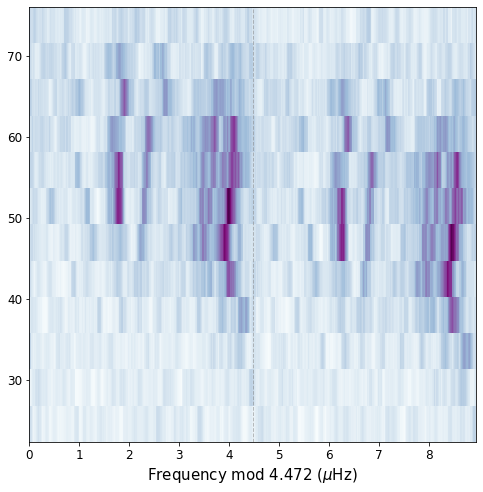

KIC 6438046
delta_nu = 3.052111287
nu_max = 31.34229796
returning dataframes


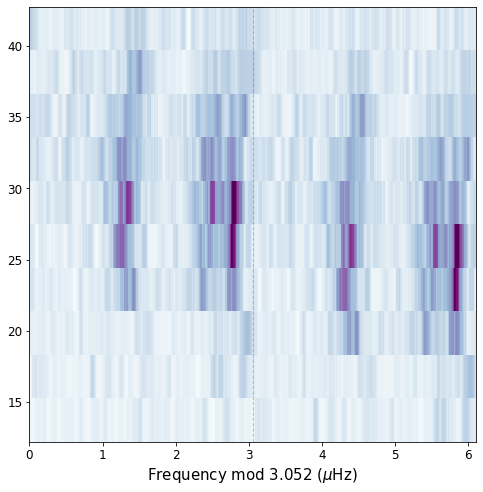

KIC 4348593
delta_nu = 5.154709108
nu_max = 61.7007231
returning dataframes


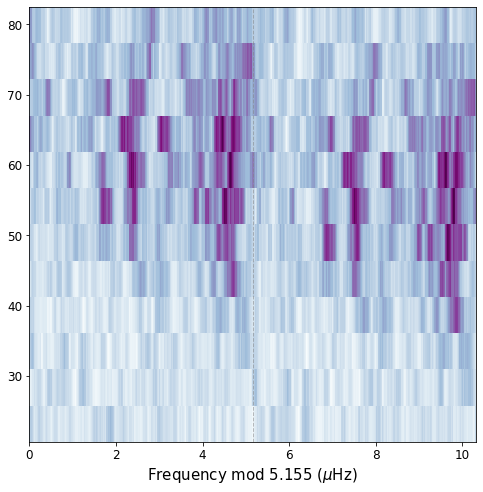

KIC 5731004
delta_nu = 6.451839073
nu_max = 81.13121643
returning dataframes


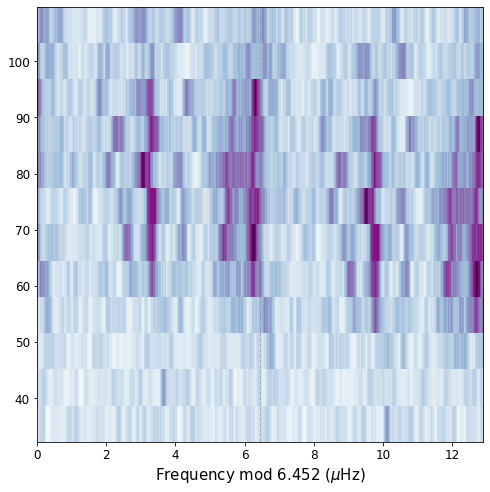

KIC 5734092
delta_nu = 5.135329493
nu_max = 60.61898319
returning dataframes


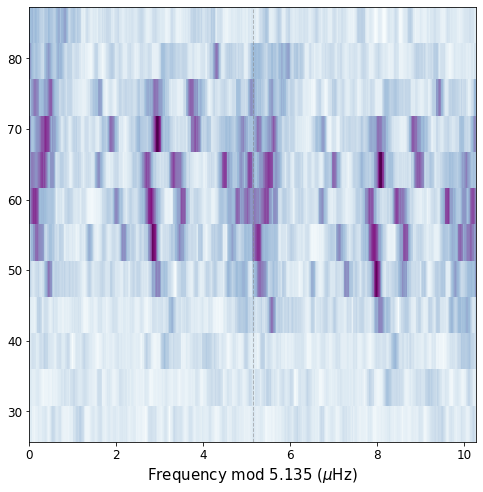

KIC 11235672
delta_nu = 5.971
nu_max = 73.81417244
returning dataframes


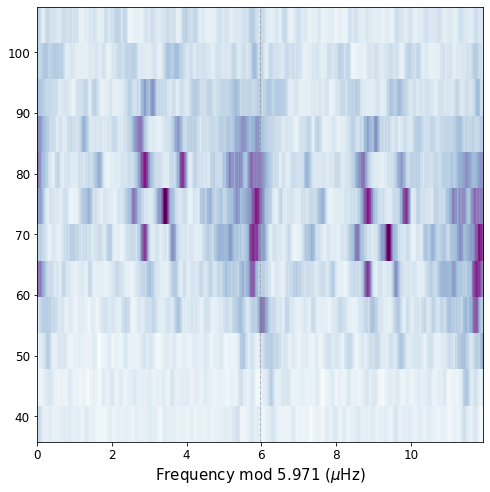

KIC 8230626
delta_nu = 7.942448123
nu_max = 109.6190669
returning dataframes


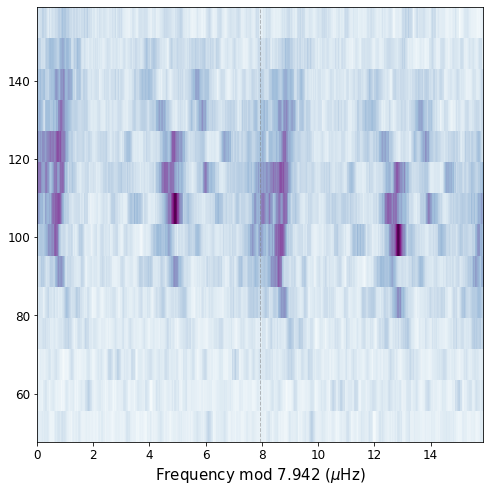

KIC 10600807
delta_nu = 4.92562089
nu_max = 53.30236636
returning dataframes


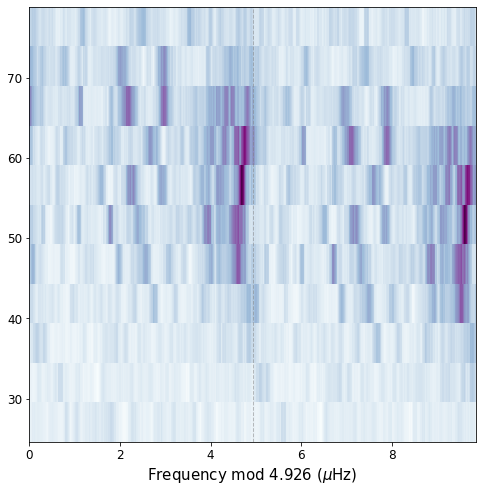

KIC 5080332
delta_nu = 6.742545102
nu_max = 84.33588972
returning dataframes


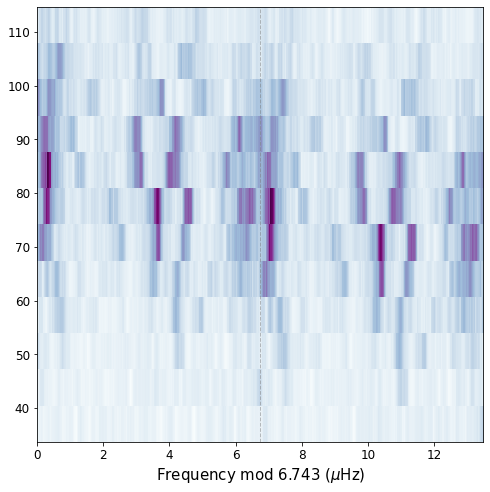

KIC 5531488
delta_nu = 7.970565236
nu_max = 103.4887592
returning dataframes


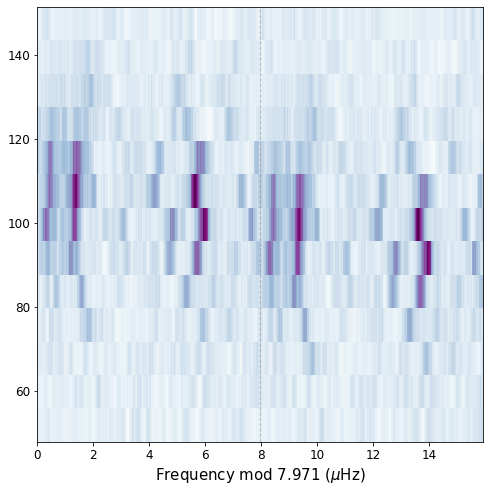

KIC 11413158
delta_nu = 5.003002463
nu_max = 59.04819055
returning dataframes


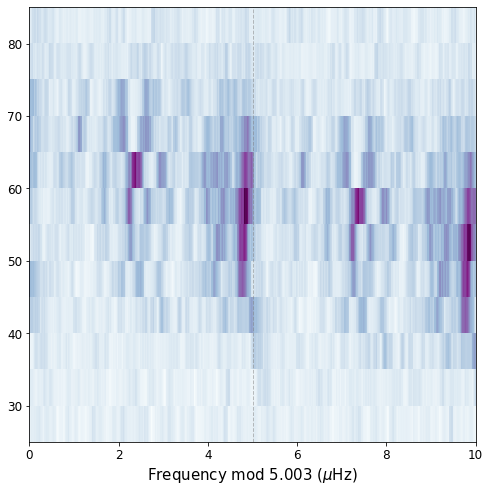

KIC 10918449
delta_nu = 3.676335148
nu_max = 38.59935048
returning dataframes


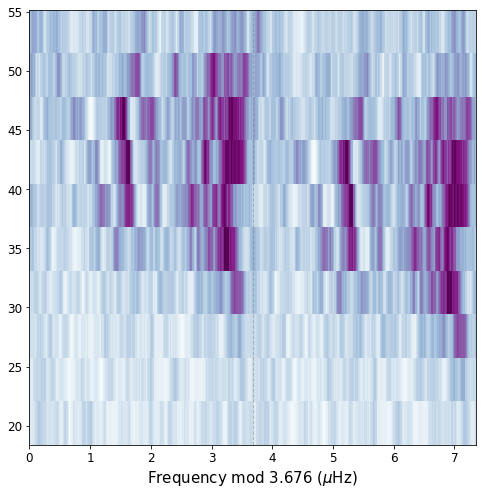

KIC 11044315
delta_nu = 5.237065516
nu_max = 61.6771031
returning dataframes


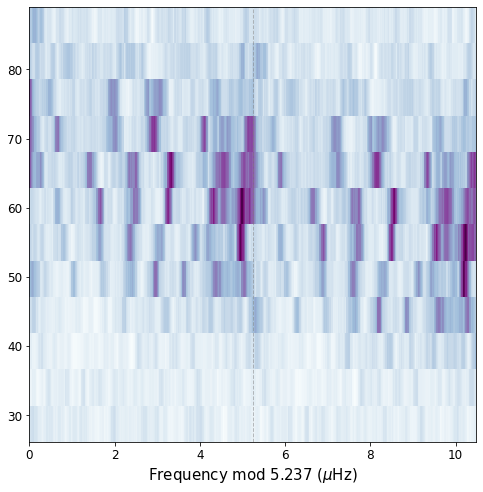

KIC 2834230
delta_nu = 7.063576148
nu_max = 86.87216418
returning dataframes


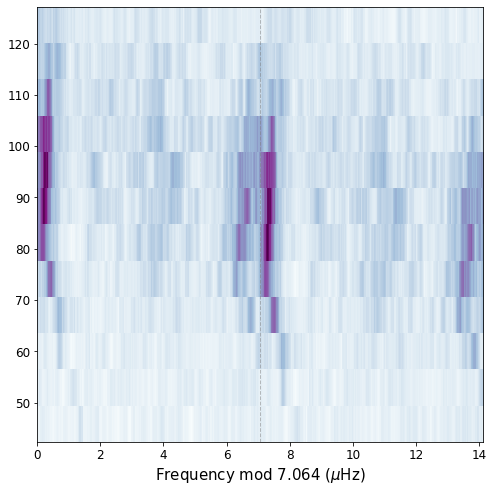

KIC 4273491
delta_nu = 5.700148012
nu_max = 70.22501162
returning dataframes


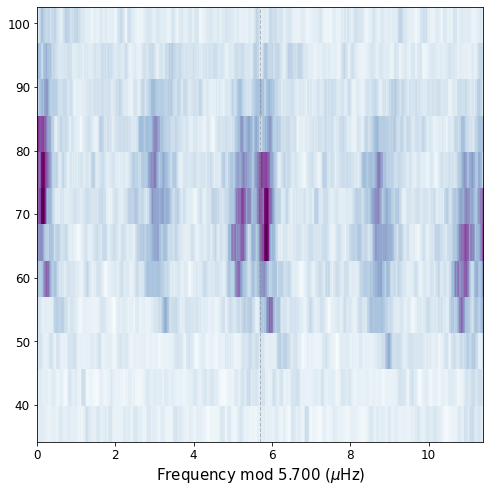

KIC 6694150
delta_nu = 6.421072606
nu_max = 79.77252397
returning dataframes


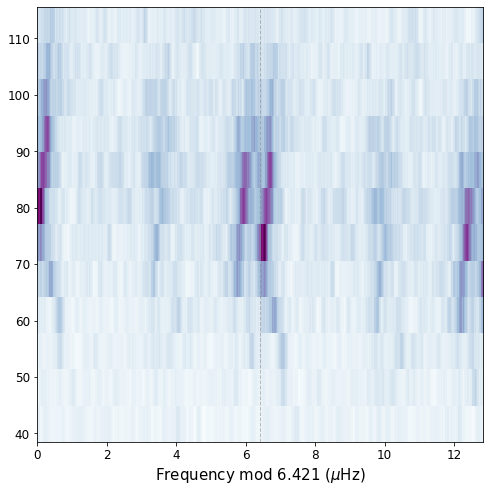

KIC 9468199
delta_nu = 4.886325191
nu_max = 57.54483356
returning dataframes


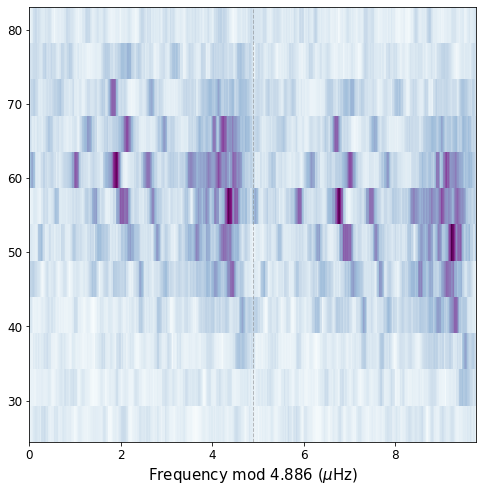

KIC 7901207
delta_nu = 6.491918062
nu_max = 81.65369012
returning dataframes


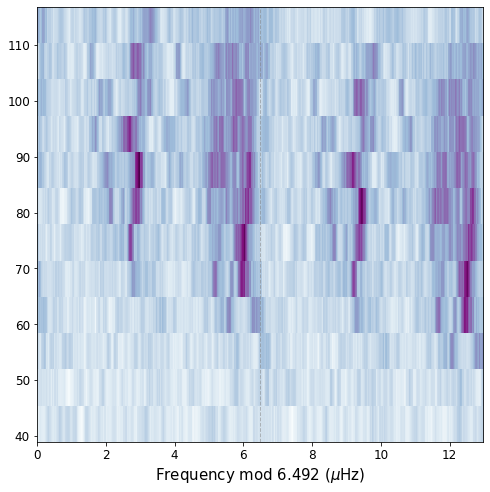

KIC 9612990
delta_nu = 5.141459349
nu_max = 59.11116173
returning dataframes


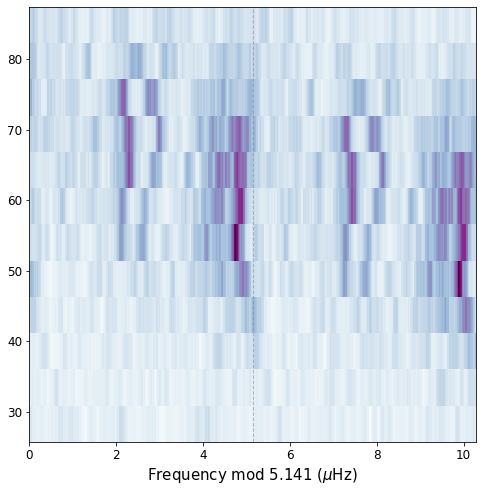

KIC 5380617
delta_nu = 4.044026179
nu_max = 43.84930897
returning dataframes


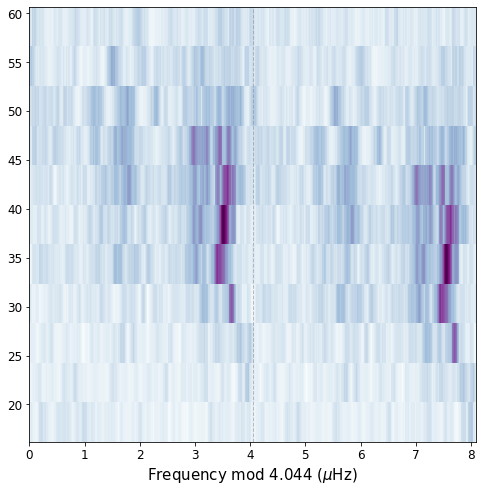

KIC 4372082
delta_nu = 6.229311355
nu_max = 79.37897776
returning dataframes


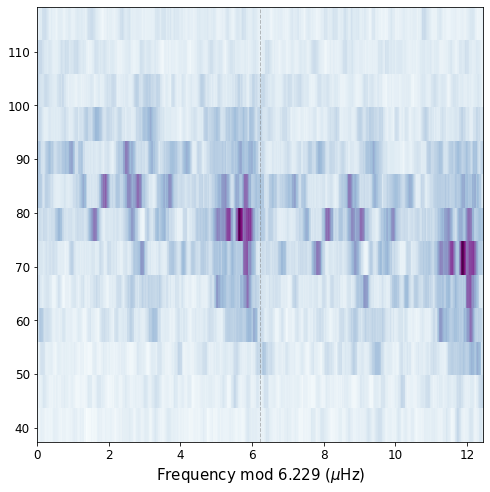

KIC 11405452
delta_nu = 4.718410579
nu_max = 52.60082713
returning dataframes


KIC 2158410
delta_nu = 4.290687885
nu_max = 46.83241728
returning dataframes


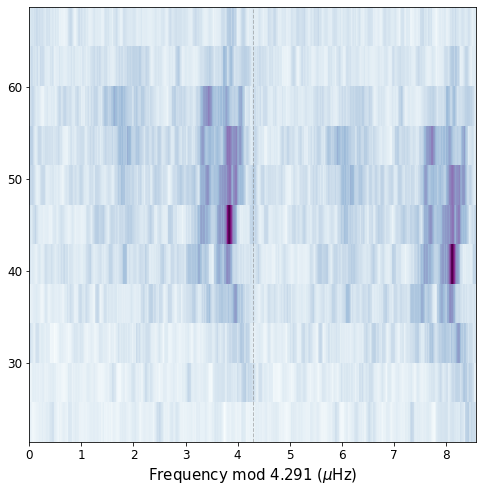

KIC 4055911
delta_nu = 5.243498646
nu_max = 59.64402266
returning dataframes


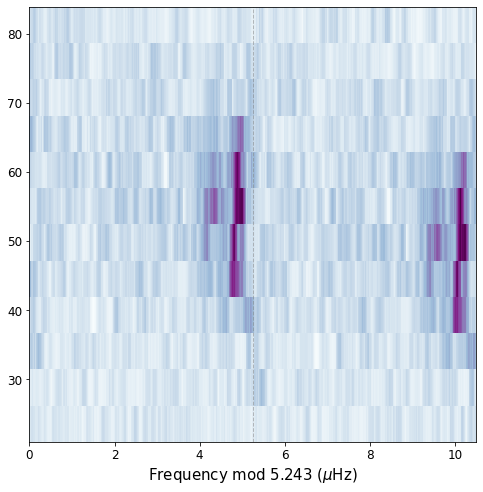

KIC 4756445
delta_nu = 6.124302753
nu_max = 74.50683206
returning dataframes


KIC 7757236
delta_nu = 5.563911775
nu_max = 61.92671851
returning dataframes


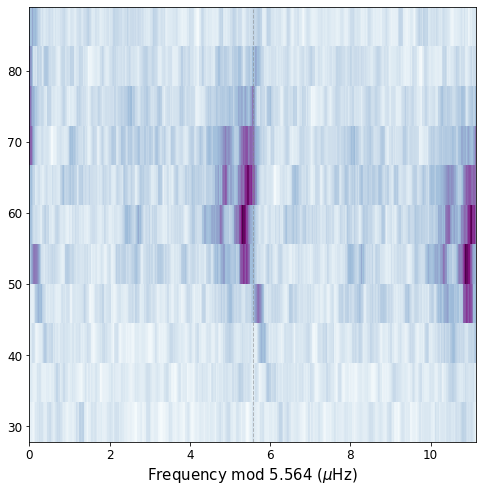

KIC 9451482
delta_nu = 6.689085281
nu_max = 81.85833032
returning dataframes


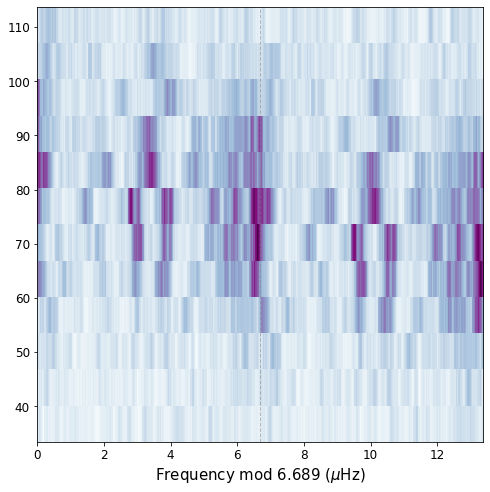

KIC 10809272
delta_nu = 5.231592463
nu_max = 59.06391959
returning dataframes


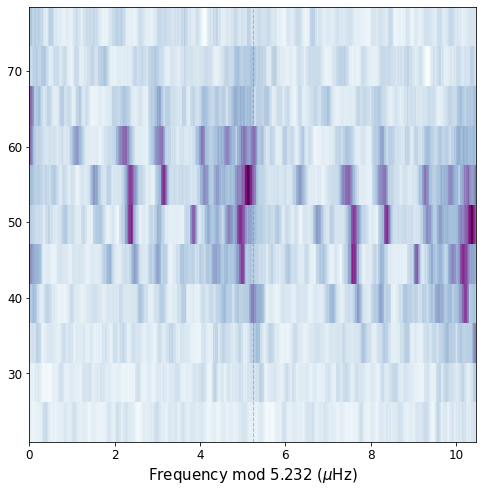

KIC 3432732
delta_nu = 6.414604814
nu_max = 80.42581978
returning dataframes


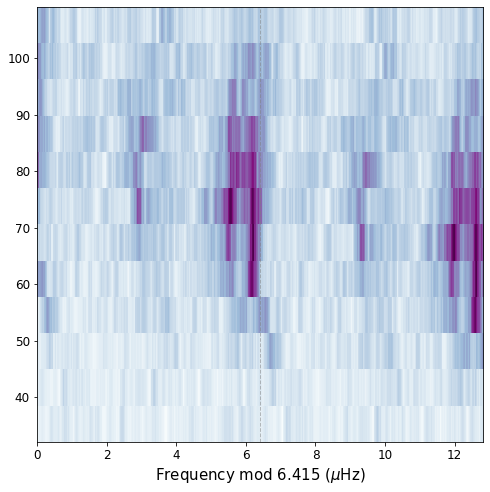

KIC 12164879
delta_nu = 4.786315047
nu_max = 54.38069006
returning dataframes


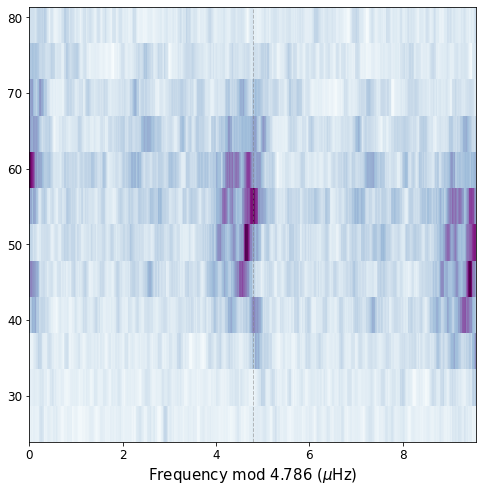

KIC 12453667
delta_nu = 7.707556098
nu_max = 99.17450813
returning dataframes


KIC 11619724
delta_nu = 2.486598524
nu_max = 23.65191048
returning dataframes


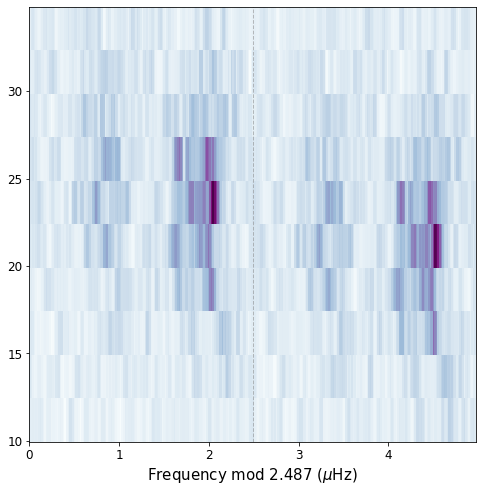

KIC 9786910
delta_nu = 2.384257616
nu_max = 22.36149255
returning dataframes


KIC 11456735
delta_nu = 7.007891798
nu_max = 90.28029054
returning dataframes


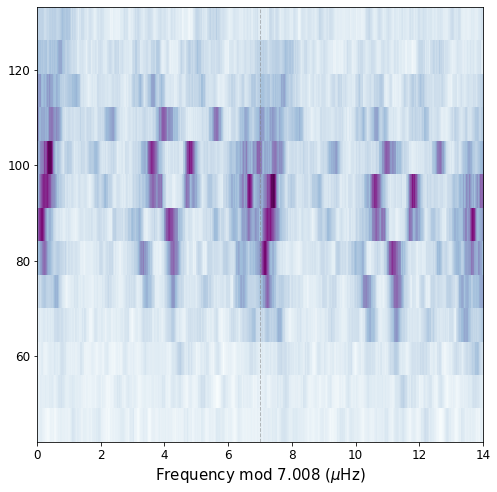

KIC 8025935
delta_nu = 5.865042095
nu_max = 70.48337297
returning dataframes


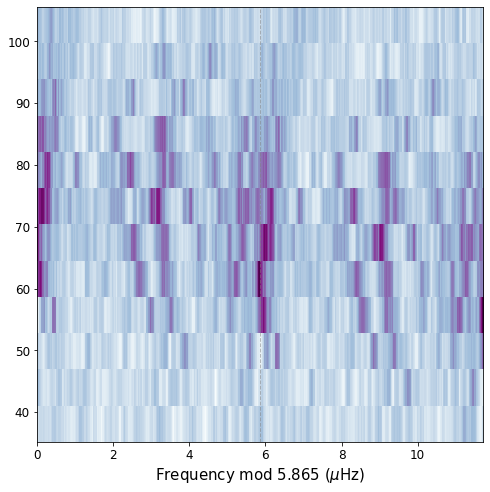

KIC 9266192
delta_nu = 6.340891835
nu_max = 88.65886875
returning dataframes


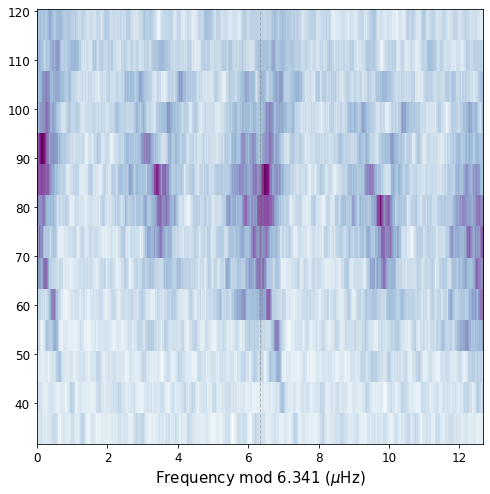

KIC 7350769
delta_nu = 7.104536459
nu_max = 88.94222959
returning dataframes


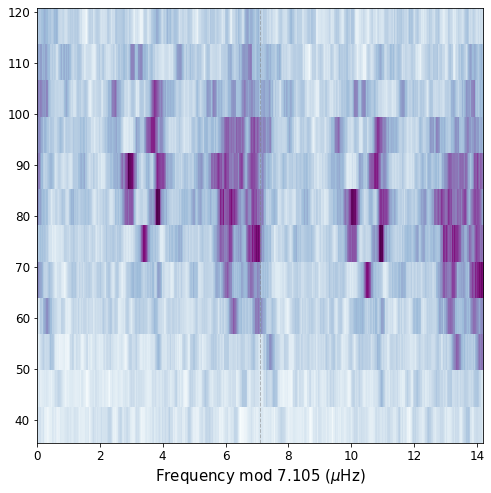

KIC 7581399
delta_nu = 6.595023163
nu_max = 83.28298191
returning dataframes


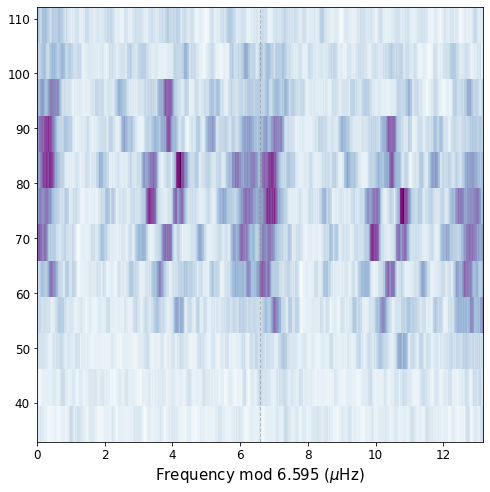

KIC 8508931
delta_nu = 5.018508331
nu_max = 59.4921547
returning dataframes


KIC 4940935
delta_nu = 3.810197694
nu_max = 39.93742509
returning dataframes


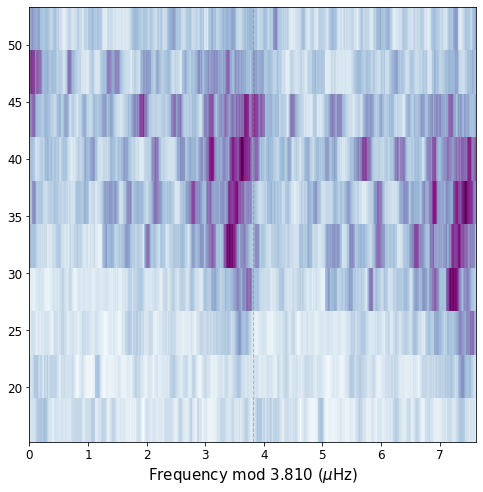

KIC 5534910
delta_nu = 8.153363217
nu_max = 109.4933995
returning dataframes


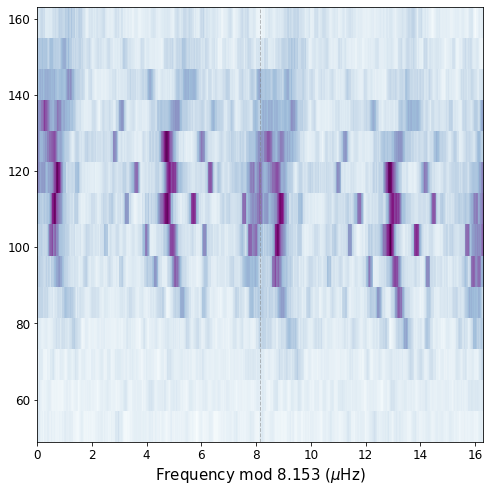

KIC 6756648
delta_nu = 6.697119666
nu_max = 81.67874551
returning dataframes


KIC 10989210
delta_nu = 4.679749528
nu_max = 51.84623263
returning dataframes


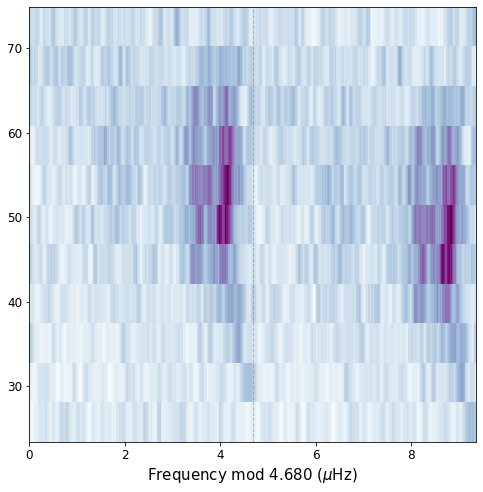

KIC 12020628
delta_nu = 6.977722738
nu_max = 88.41486408
returning dataframes


KIC 9846437
delta_nu = 1.734473101
nu_max = 15.56421253
returning dataframes


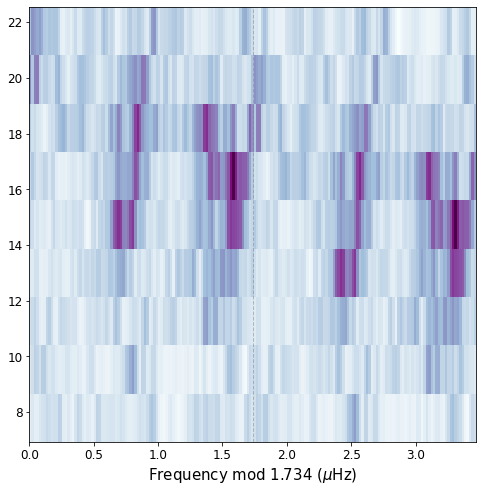

KIC 10621713
delta_nu = 3.372937979
nu_max = 34.86679298
returning dataframes


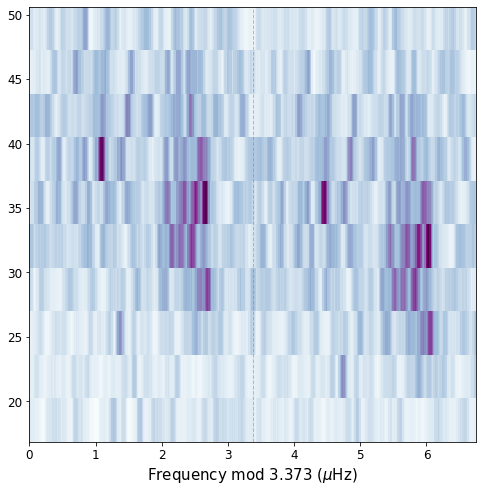

KIC 3758731
delta_nu = 6.24079082
nu_max = 75.87638623
returning dataframes


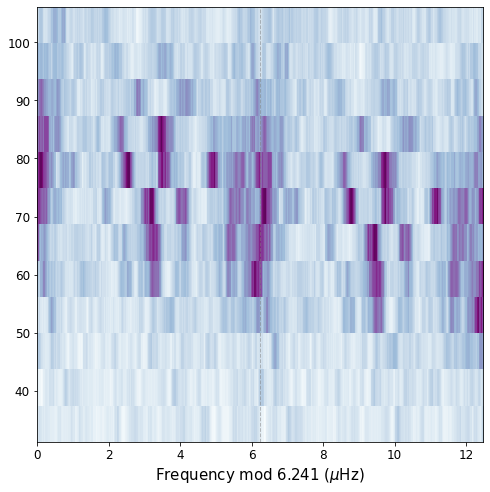

KIC 8395466
delta_nu = 5.694619199
nu_max = 67.36783606
returning dataframes


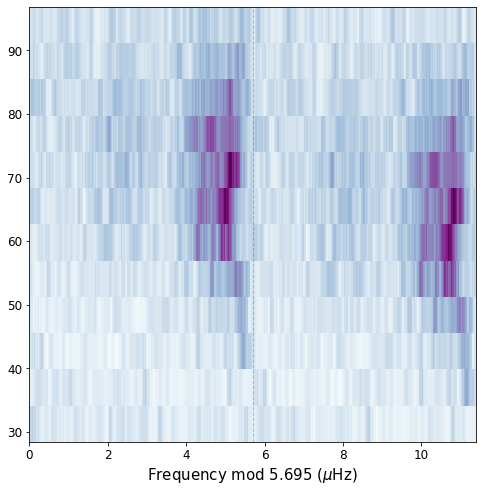

KIC 7052311
delta_nu = 4.717993959
nu_max = 52.81436978
returning dataframes


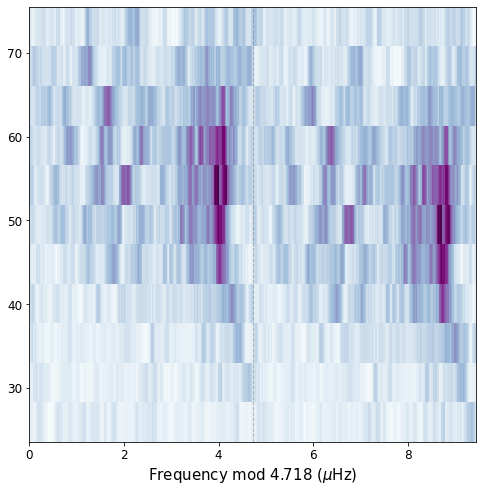

KIC 8107227
delta_nu = 6.077266666
nu_max = 72.8303057
returning dataframes


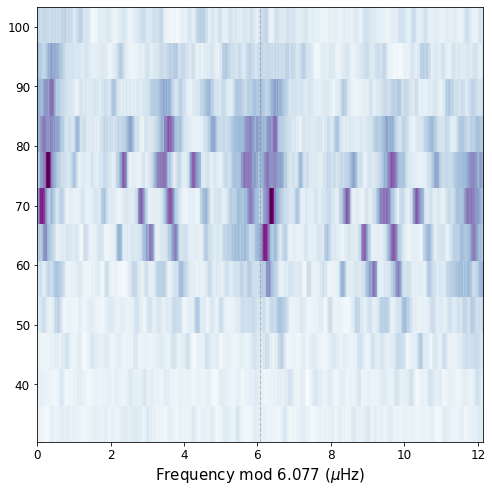

KIC 9655167
delta_nu = 8.051316798
nu_max = 104.7865362
returning dataframes


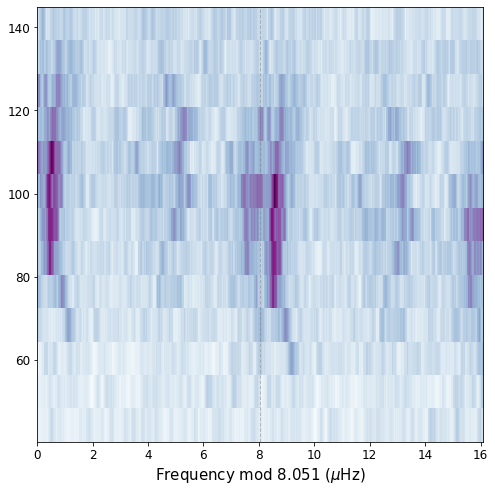

KIC 12603148
delta_nu = 4.84201334
nu_max = 56.26972714
returning dataframes


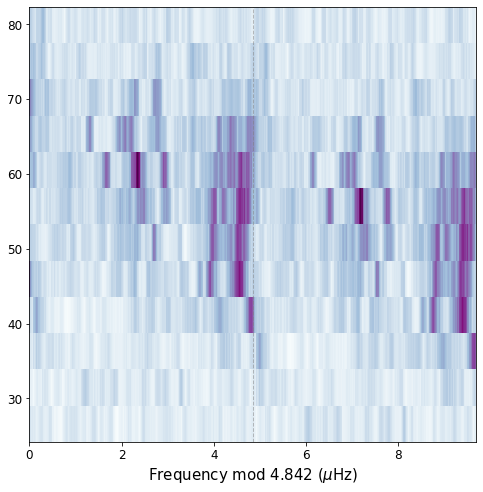

KIC 2984102
delta_nu = 5.581774708
nu_max = 64.8333809
returning dataframes


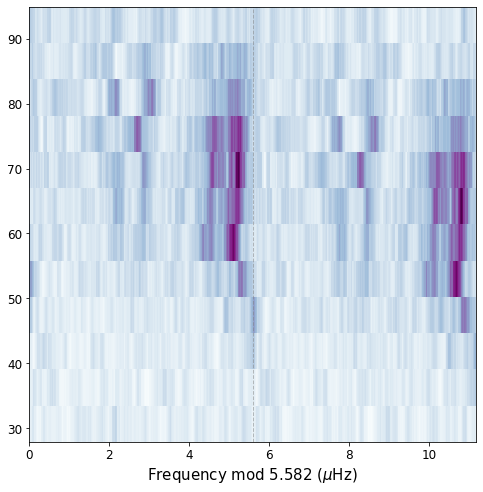

KIC 9655101
delta_nu = 7.882247257
nu_max = 99.86716532
returning dataframes


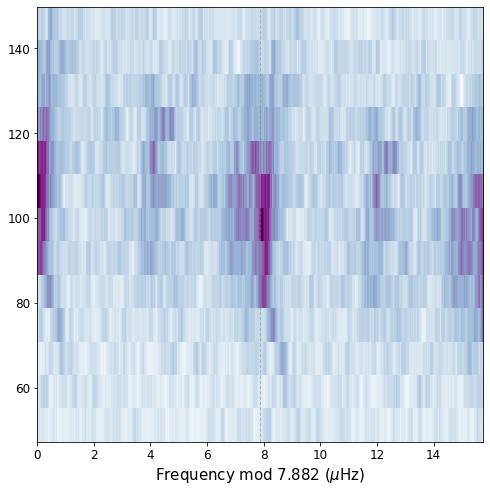

KIC 4179377
delta_nu = 2.697236328
nu_max = 25.89714969
returning dataframes


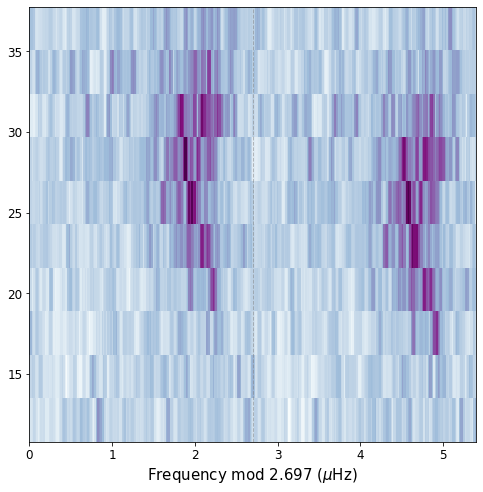

KIC 5707338
delta_nu = 6.396973955
nu_max = 80.64620586
returning dataframes


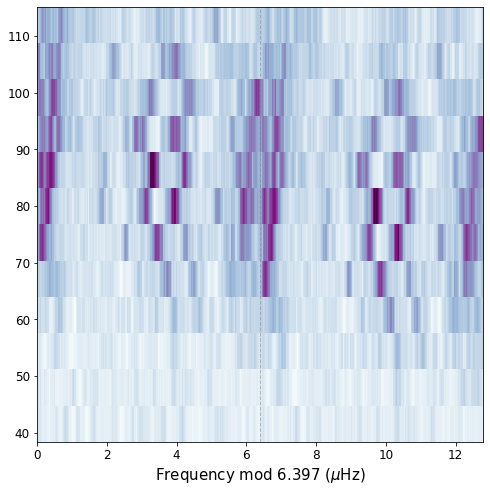

KIC 2845610
delta_nu = 7.107551257
nu_max = 92.31102247
returning dataframes


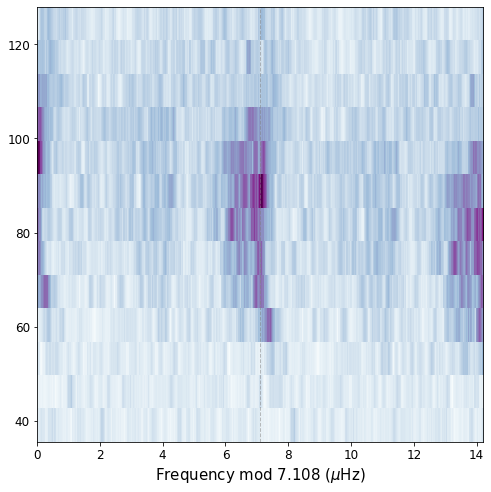

KIC 5104175
delta_nu = 7.076638518
nu_max = 89.39168558
returning dataframes


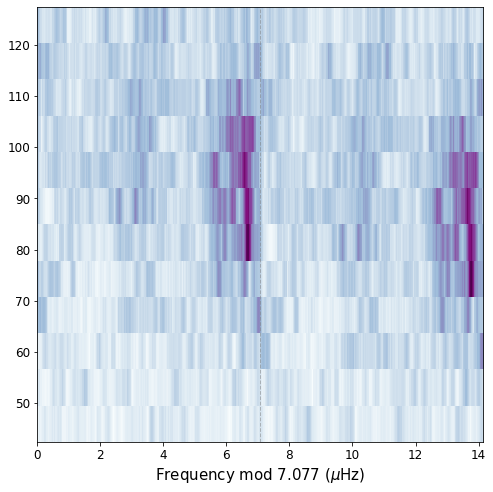

KIC 9836930
delta_nu = 5.946770798
nu_max = 73.26320704
returning dataframes


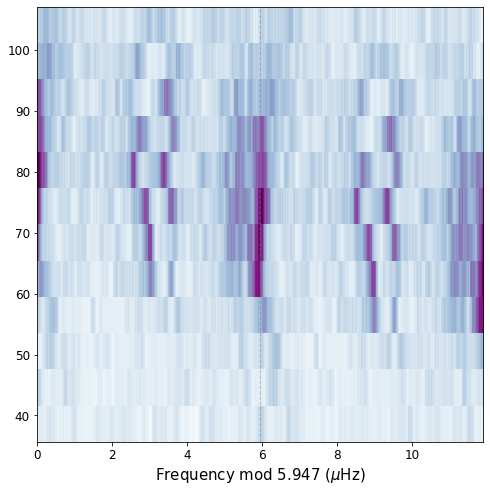

KIC 3660976
delta_nu = 3.85759814
nu_max = 40.22865258
returning dataframes


KIC 6382830
delta_nu = 2.518467343
nu_max = 22.92820582
returning dataframes


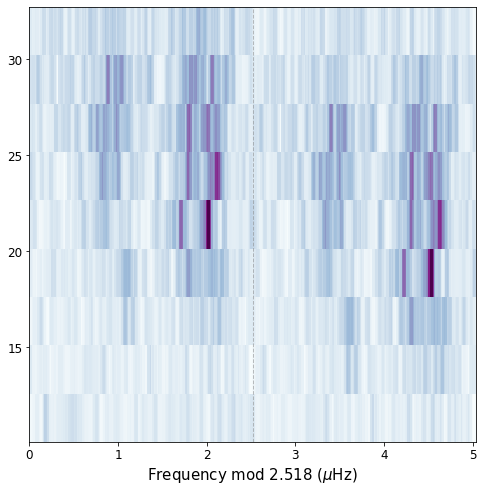

KIC 7708681
delta_nu = 6.319821556
nu_max = 78.45806749
returning dataframes


KIC 4651366
delta_nu = 4.652537294
nu_max = 52.62546739
returning dataframes


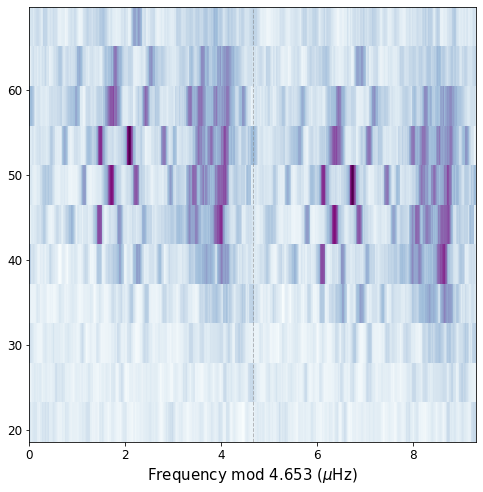

KIC 8232262
delta_nu = 5.978852802
nu_max = 73.49933923
returning dataframes


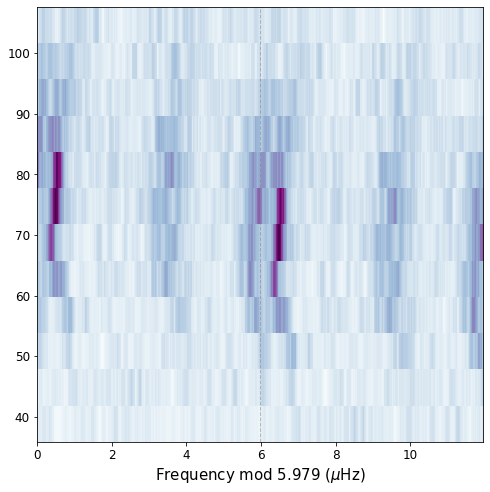

KIC 9226335
delta_nu = 4.53441698
nu_max = 50.42158496
returning dataframes


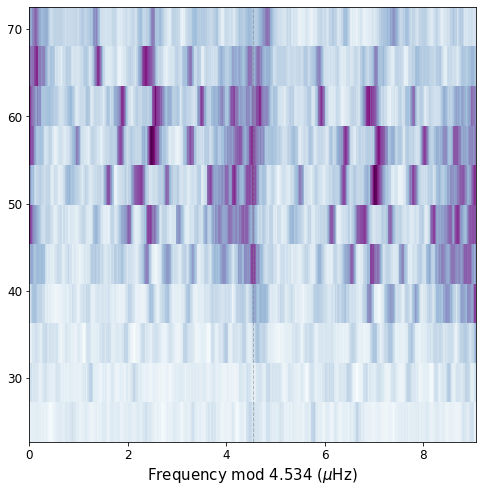

KIC 11045134
delta_nu = 4.384198363
nu_max = 49.83912925
returning dataframes


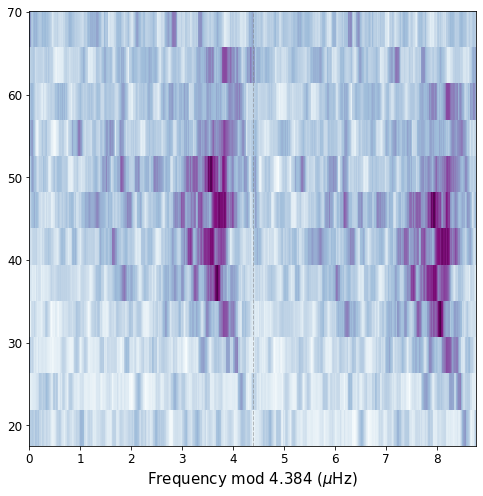

KIC 2860936
delta_nu = 7.643779893
nu_max = 98.32446318
returning dataframes


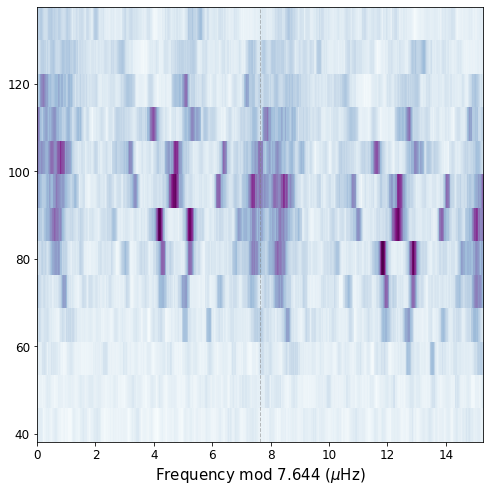

KIC 10162765
delta_nu = 6.801790911
nu_max = 85.50260178
returning dataframes


KIC 3430048
delta_nu = 3.518327282
nu_max = 33.62687497
returning dataframes


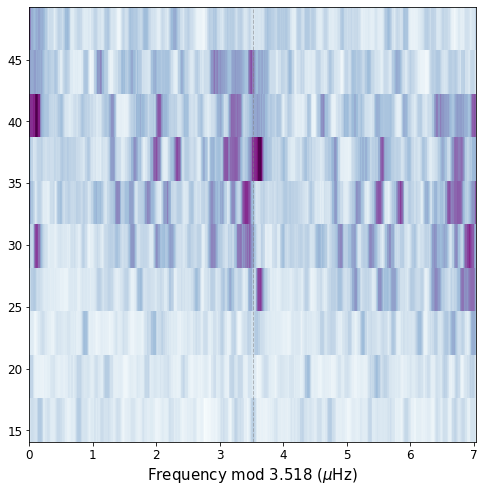

KIC 7116721
delta_nu = 4.514955516
nu_max = 50.98829849
returning dataframes


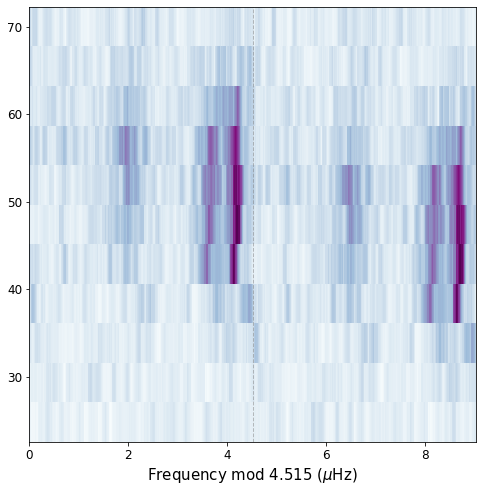

KIC 7347076
delta_nu = 7.217618953
nu_max = 90.71324193
returning dataframes


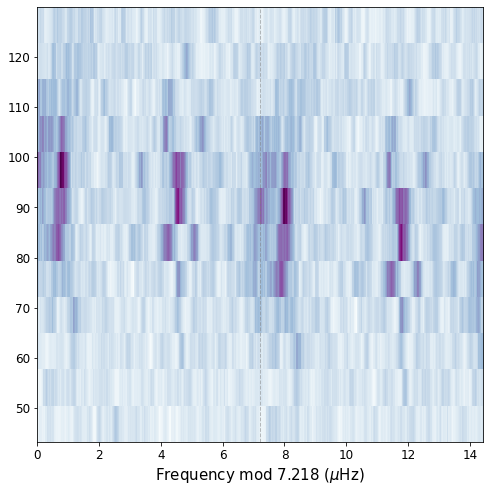

KIC 10163776
delta_nu = 6.166957297
nu_max = 74.76656675
returning dataframes


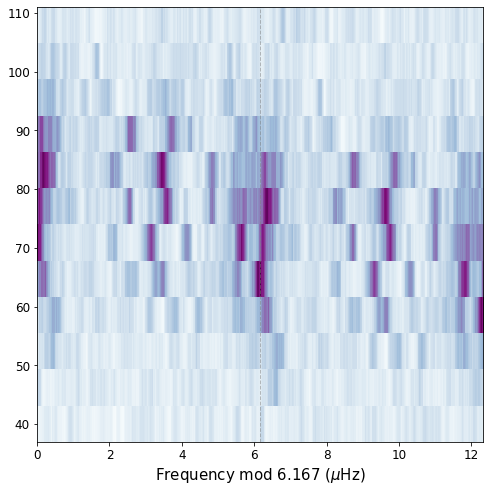

In [26]:
for i in range(0,len(highmass_rc_newvals)):
    star_name = 'KIC '+str(highmass_rc_newvals['KIC'][i])
    if star_name not in ['KIC 2579142','KIC 4060757']:
#         delta_nu,nu_max,lightcurve,powerspec = read_star_hp(star_name,suppress_output=False)
        delta_nu,nu_max,lightcurve,powerspec = read_star_bdps(star_name,suppress_output=False)
        echelle_wrapper(freq=np.asarray(powerspec['freq']),power=np.asarray(powerspec['power']),
                 dnu=delta_nu,
                 fmin=(0.5*nu_max),fmax=(1.5*nu_max),smooth_percent=0.02)
        plt.show()

In [20]:
i=47
star_name = 'KIC '+str(highmass_rc_newvals['KIC'][i])
delta_nu,nu_max,lightcurve,powerspec = read_star_hp(star_name,suppress_output=False)
delta_nu = 5.946
interact(echelle_wrapper,freq=fixed(np.asarray(powerspec['freq'])),power=fixed(np.asarray(powerspec['power'])),
         dnu=FloatSlider(min=delta_nu-0.5,max=delta_nu+0.5,step=0.005,value=delta_nu),
         fmin=fixed(0.5*nu_max),fmax=fixed(1.5*nu_max),smooth_percent=fixed(0.02))

KIC 11235672
delta_nu = 11.25990984
nu_max = 73.81417244
returning dataframes


interactive(children=(FloatSlider(value=5.946, description='dnu', max=6.446, min=5.446, step=0.005), Output())…

<function __main__.echelle_wrapper(freq, power, dnu, fmin, fmax, smooth_percent=0.02)>

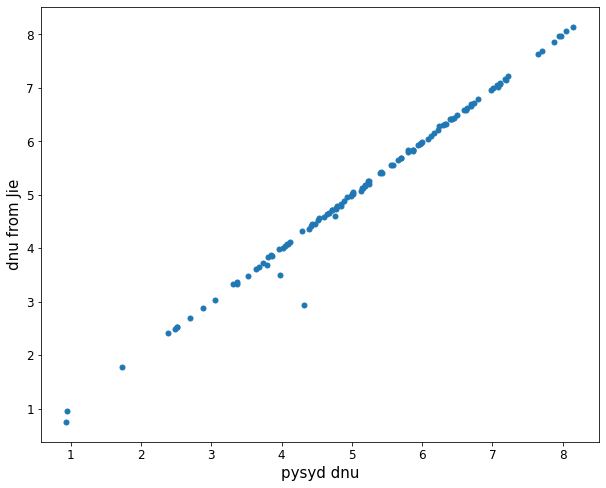

In [11]:
plt.scatter(highmass_rc_newvals['pysyd_dnu'],highmass_rc['Delnu'])
plt.ylabel('dnu from Jie')
plt.xlabel('pysyd dnu')
plt.show()

median frac difference: -0.001474884151067372


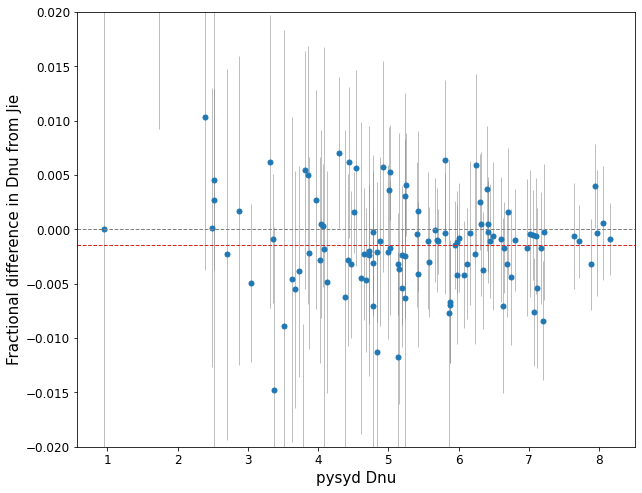

In [12]:
median_diff = np.nanmedian((highmass_rc['Delnu']-highmass_rc_newvals['pysyd_dnu'])/highmass_rc_newvals['pysyd_dnu'])
print('median frac difference:',median_diff)

plt.scatter(highmass_rc_newvals['pysyd_dnu'],(highmass_rc['Delnu']-highmass_rc_newvals['pysyd_dnu'])/highmass_rc_newvals['pysyd_dnu'])
plt.errorbar(highmass_rc_newvals['pysyd_dnu'],(highmass_rc['Delnu']-highmass_rc_newvals['pysyd_dnu'])/highmass_rc_newvals['pysyd_dnu'],
            yerr=highmass_rc['e_Delnu']/highmass_rc['Delnu'],
            linestyle='None',color='grey',zorder=0,alpha=0.5)
plt.ylabel('Fractional difference in Dnu from Jie')
plt.xlabel('pysyd Dnu')
plt.axhline(0,color='grey',linestyle='--')
plt.axhline(median_diff,color='tab:red',linestyle='--')
plt.ylim(bottom=-0.06)
plt.ylim(-0.02,0.02)
plt.show()

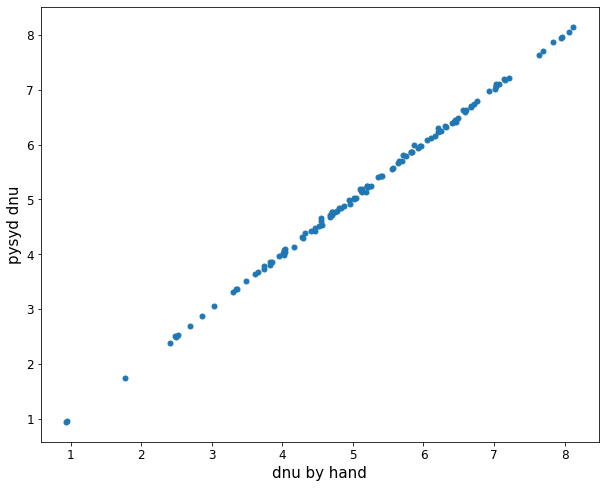

In [13]:
plt.scatter(highmass_rc_newvals['Delnu'],highmass_rc_newvals['pysyd_dnu'])
plt.xlabel('dnu by hand')
plt.ylabel('pysyd dnu')
plt.show()

median frac difference: 0.0031664639001349956


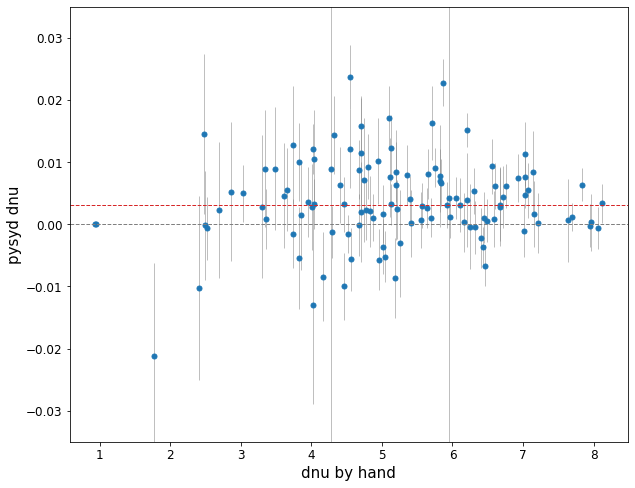

In [22]:
median_diff = np.nanmedian((highmass_rc_newvals['pysyd_dnu']-highmass_rc_newvals['Delnu'])/highmass_rc_newvals['Delnu'])
print('median frac difference:',median_diff)

plt.scatter(highmass_rc_newvals['Delnu'],
            (highmass_rc_newvals['pysyd_dnu']-highmass_rc_newvals['Delnu'])/highmass_rc_newvals['Delnu'])
plt.errorbar(highmass_rc_newvals['Delnu'],
            (highmass_rc_newvals['pysyd_dnu']-highmass_rc_newvals['Delnu'])/highmass_rc_newvals['Delnu'],
            yerr=highmass_rc_newvals['e_pysyd_dnu']/highmass_rc_newvals['pysyd_dnu'],
            linestyle='None',color='grey',zorder=0,alpha=0.5)
plt.axhline(0,color='grey',linestyle='--')
plt.axhline(median_diff,color='tab:red',linestyle='--')
plt.xlabel('dnu by hand')
plt.ylabel('pysyd dnu')
plt.ylim(-0.035,0.035)
plt.show()

# Creating an adopted Teff column

In [292]:
highmass_rc_newvals

KIC  numax  pysyd_numax  e_pysyd_numax  new_numax  smooth_numax  \
0     3347458  39.99    40.291621       0.904390      40.32     41.422682   
1     8378545  48.82    47.769061       1.989659      48.07     48.952072   
2     5978324  49.10    48.776551       0.974408      48.78     50.072904   
3    10068490  66.42    58.662513       1.977989      58.84     60.906533   
4     4756133  80.81    80.362852       2.357250      80.29     83.967767   
..        ...    ...          ...            ...        ...           ...   
110  10162765  88.56    85.502602       2.118024      85.53     89.092562   
111   3430048  35.82    33.626875       2.147042      33.63     37.856607   
112   7116721  50.86    50.988298       1.581224      50.97     53.768334   
113   7347076  90.59    90.713242       1.757715      90.65     94.236618   
114  10163776  76.00    74.766567       2.322241      74.77     79.174323   

     Delnu  pysyd_dnu  e_pysyd_dnu  o_Teff  ...  L_[Fe/H]  L_[Fe/H]_e  \
0    3.360   3.362861     0.016179    5000  ...       NaN         NaN   
1    3.952   3.966159     0.022203    5058  ...     0.323       0.030   
2    4.024   4.072667     0.016443    5051  ...       NaN         NaN   
3    5.206   5.239133     0.046630    5189  ...    -0.216       0.035   
4    5.865   5.998605     0.022750    5152  ...       NaN         NaN   
..     ...        ...          ...     ...  ...       ...         ...   
110  6.760   6.801791     0.023959    4948  ...     0.085       0.018   
111  3.487   3.518327     0.034631    5079  ...       NaN         NaN   
112  4.522   4.514956     0.013743    5028  ...     0.049       0.025   
113  7.216   7.217619     0.034534    5386  ...    -0.007       0.044   
114  6.165   6.166957     0.029330    5106  ...    -0.083       0.022   

     Teff_adopt  Teff_e_adopt  log(g)_adopt  log(g)_e_adopt  feh_adopt  \
0      4863.000     84.000000        2.5250        0.039000     0.1650   
1      4984.000     43.591857        2.9515        0.118829     0.2400   
2      5051.000     92.000000        2.7010        0.050000    -0.0980   
3      5241.375     51.090728        2.7340        0.127322    -0.2085   
4      5186.000     95.000000        3.0140        0.056000     0.0910   
..          ...           ...           ...             ...        ...   
110    5067.945     46.560283        2.9160        0.095395     0.0805   
111    4838.000     84.000000        2.5020        0.039000     0.1060   
112    4798.390     26.510000        2.6770        0.044000     0.0490   
113    5076.470     46.210000        2.9150        0.076000    -0.0070   
114    5092.255     53.562487        2.7475        0.104911    -0.0595   

     feh_e_adopt  adopt_flag  adopt_flag_int  
0       0.007000      apogee               1  
1       0.086673         avg               0  
2       0.008000      apogee               1  
3       0.093675         avg               0  
4       0.008000      apogee               1  
..           ...         ...             ...  
110     0.067201         avg               0  
111     0.007000      apogee               1  
112     0.025000      lamost               2  
113     0.044000      lamost               2  
114     0.074330         avg               0  

[115 rows x 48 columns]

In [293]:
## need to make a list of adopted Teff and its error values
teff = []
e_teff = []
logg = []
e_logg = []
feh = []
e_feh = []
flag = [] #avg,apogee,lamost,jie
flag_int = [] #0,1,2,3
for i in range(0,len(highmass_rc_newvals)):
    if not pd.isnull(highmass_rc_newvals['a_Teff'][i]):
        if not pd.isnull(highmass_rc_newvals['L_Teff'][i]):
            teff.append(np.average([highmass_rc_newvals['a_Teff'][i],highmass_rc_newvals['L_Teff'][i]]))
            e_teff.append(np.sqrt((1/4)*highmass_rc_newvals['a_Teff_e'][i]**2+(1/4)*highmass_rc_newvals['L_Teff_e'][i]))
            logg.append(np.average([highmass_rc_newvals['a_log(g)'][i],highmass_rc_newvals['L_log(g)'][i]]))
            e_logg.append(np.sqrt((1/4)*highmass_rc_newvals['a_log(g)_e'][i]**2+(1/4)*highmass_rc_newvals['L_log(g)_e'][i]))
            feh.append(np.average([highmass_rc_newvals['a_[Fe/H]'][i],highmass_rc_newvals['L_[Fe/H]'][i]]))
            e_feh.append(np.sqrt((1/4)*highmass_rc_newvals['a_[Fe/H]_e'][i]**2+(1/4)*highmass_rc_newvals['L_[Fe/H]_e'][i]))
            flag.append('avg')
            flag_int.append(0)
        else:
            teff.append(highmass_rc_newvals['a_Teff'][i])
            e_teff.append(highmass_rc_newvals['a_Teff_e'][i])
            logg.append(highmass_rc_newvals['a_log(g)'][i])
            e_logg.append(highmass_rc_newvals['a_log(g)_e'][i])
            feh.append(highmass_rc_newvals['a_[Fe/H]'][i])
            e_feh.append(highmass_rc_newvals['a_[Fe/H]_e'][i])
            flag.append('apogee')
            flag_int.append(1)
#             print('return apogee')
    elif not pd.isnull(highmass_rc_newvals['L_Teff'][i]):
        teff.append(highmass_rc_newvals['L_Teff'][i])
        e_teff.append(highmass_rc_newvals['L_Teff_e'][i])
        logg.append(highmass_rc_newvals['L_log(g)'][i])
        e_logg.append(highmass_rc_newvals['L_log(g)_e'][i])
        feh.append(highmass_rc_newvals['L_[Fe/H]'][i])
        e_feh.append(highmass_rc_newvals['L_[Fe/H]_e'][i])
        flag.append('lamost')
        flag_int.append(2)
#         print('return lamost')
    else:
        teff.append(highmass_rc_newvals['o_Teff'][i])
        e_teff.append(highmass_rc['e_Teff'][i])
        logg.append(highmass_rc_newvals['o_log(g)'][i])
        e_logg.append(highmass_rc['e_log(g)'][i])
        feh.append(highmass_rc_newvals['o_[Fe/H]'][i])
        e_feh.append(highmass_rc['e_[Fe/H]'][i])
        flag.append('jie')
        flag_int.append(3)
#         print('return jie')
# print(teff)

In [294]:
highmass_rc_newvals['Teff_adopt'] = teff
highmass_rc_newvals['Teff_e_adopt'] = e_teff
highmass_rc_newvals['log(g)_adopt'] = logg
highmass_rc_newvals['log(g)_e_adopt'] = e_logg
highmass_rc_newvals['feh_adopt'] = feh
highmass_rc_newvals['feh_e_adopt'] = e_feh
highmass_rc_newvals['adopt_flag'] = flag
highmass_rc_newvals['adopt_flag_int'] = flag_int

In [295]:
highmass_rc_newvals.to_csv('../datatables/highmass_rc_newvals.csv',index=False)
highmass_rc_newvals

KIC  numax  pysyd_numax  e_pysyd_numax  new_numax  smooth_numax  \
0     3347458  39.99    40.291621       0.904390      40.32     41.422682   
1     8378545  48.82    47.769061       1.989659      48.07     48.952072   
2     5978324  49.10    48.776551       0.974408      48.78     50.072904   
3    10068490  66.42    58.662513       1.977989      58.84     60.906533   
4     4756133  80.81    80.362852       2.357250      80.29     83.967767   
..        ...    ...          ...            ...        ...           ...   
110  10162765  88.56    85.502602       2.118024      85.53     89.092562   
111   3430048  35.82    33.626875       2.147042      33.63     37.856607   
112   7116721  50.86    50.988298       1.581224      50.97     53.768334   
113   7347076  90.59    90.713242       1.757715      90.65     94.236618   
114  10163776  76.00    74.766567       2.322241      74.77     79.174323   

     Delnu  pysyd_dnu  e_pysyd_dnu  o_Teff  ...  L_[Fe/H]  L_[Fe/H]_e  \
0    3.360   3.362861     0.016179    5000  ...       NaN         NaN   
1    3.952   3.966159     0.022203    5058  ...     0.323       0.030   
2    4.024   4.072667     0.016443    5051  ...       NaN         NaN   
3    5.206   5.239133     0.046630    5189  ...    -0.216       0.035   
4    5.865   5.998605     0.022750    5152  ...       NaN         NaN   
..     ...        ...          ...     ...  ...       ...         ...   
110  6.760   6.801791     0.023959    4948  ...     0.085       0.018   
111  3.487   3.518327     0.034631    5079  ...       NaN         NaN   
112  4.522   4.514956     0.013743    5028  ...     0.049       0.025   
113  7.216   7.217619     0.034534    5386  ...    -0.007       0.044   
114  6.165   6.166957     0.029330    5106  ...    -0.083       0.022   

     Teff_adopt  Teff_e_adopt  log(g)_adopt  log(g)_e_adopt  feh_adopt  \
0      4863.000     84.000000        2.5250        0.039000     0.1650   
1      4984.000     43.591857        2.9515        0.118829     0.2400   
2      5051.000     92.000000        2.7010        0.050000    -0.0980   
3      5241.375     51.090728        2.7340        0.127322    -0.2085   
4      5186.000     95.000000        3.0140        0.056000     0.0910   
..          ...           ...           ...             ...        ...   
110    5067.945     46.560284        2.9160        0.095395     0.0805   
111    4838.000     84.000000        2.5020        0.039000     0.1060   
112    4798.390     26.510000        2.6770        0.044000     0.0490   
113    5076.470     46.210000        2.9150        0.076000    -0.0070   
114    5092.255     53.562487        2.7475        0.104911    -0.0595   

     feh_e_adopt  adopt_flag  adopt_flag_int  
0       0.007000      apogee               1  
1       0.086673         avg               0  
2       0.008000      apogee               1  
3       0.093675         avg               0  
4       0.008000      apogee               1  
..           ...         ...             ...  
110     0.067201         avg               0  
111     0.007000      apogee               1  
112     0.025000      lamost               2  
113     0.044000      lamost               2  
114     0.074330         avg               0  

[115 rows x 48 columns]

# Calculating masses

In [40]:
import asfgrid

In [41]:
s=asfgrid.Seism()

[[('logz', 'float64', ()), ('mass', 'float64', ()), ('evstate', 'float64', ()), ('logg_teff', 'float64', ()), ('logg', 'float64', ()), ('teff', 'float64', ()), ('fdnu', 'float64', ()), ('fdnu_int', 'float64', ()), ('mass_nu', 'float64', ()), ('age', 'float64', ()), ('dp', 'float64', ()), ('central_he4', 'float64', ()), ('model', 'int64', ())], [b'NULL', b'NULL', b'NULL', b'NULL', b'NULL', b'NULL', b'NULL', b'NULL', b'NULL', b'NULL', b'NULL', b'NULL', b'NULL']]
[[('logz', 'float64', ()), ('mass', 'float64', ()), ('evstate', 'float64', ()), ('logg_teff', 'float64', ()), ('logg', 'float64', ()), ('teff', 'float64', ()), ('fdnu', 'float64', ()), ('fdnu_int', 'float64', ()), ('mass_nu', 'float64', ()), ('age', 'float64', ()), ('dp', 'float64', ()), ('central_he4', 'float64', ()), ('model', 'int64', ())], [b'NULL', b'NULL', b'NULL', b'NULL', b'NULL', b'NULL', b'NULL', b'NULL', b'NULL', b'NULL', b'NULL', b'NULL', b'NULL']]


In [42]:
nu_max_solar = 3090 #uHz
delta_nu_solar = 135.1 #uHz
teff_solar = 5777 #K

def mass_uncorrected(nu_max, delta_nu, teff):
    mass = (nu_max/nu_max_solar)**(3) * (delta_nu/delta_nu_solar)**(-4) * (teff/teff_solar)**(1.5)
    return mass

def masserr_nofdnu(nu_max, delta_nu, teff, err_nu_max, err_delta_nu, err_teff, mass):
    inside_radical = (3*err_nu_max/nu_max)**2 + (4*err_delta_nu/delta_nu)**2 + ((3/2)*err_teff/teff)**2
    masserr = mass*np.sqrt(inside_radical)
    return masserr

def mass_corrected(nu_max, delta_nu, teff, fdnu):
    mass = (nu_max/nu_max_solar)**(3) * (delta_nu/(fdnu*delta_nu_solar))**(-4) * (teff/teff_solar)**(1.5)
    return mass

In [296]:
adjusted_masses = pd.DataFrame(columns=['KIC','a_fdnu','a_uncorr_mass','a_corr_mass','a_corr_mass_e',
                                        'L_fdnu','L_uncorr_mass','L_corr_mass','L_corr_mass_e',
                                        'j_fdnu','j_uncorr_mass','j_corr_mass','j_corr_mass_e',
                                        'g_fdnu','g_uncorr_mass','g_corr_mass','g_corr_mass_e',
                                        'gs_fdnu','gs_uncorr_mass','gs_corr_mass','gs_corr_mass_e'],
                               index=range(len(highmass_rc_newvals['KIC'])))

# ii=0
for i in range(0,len(highmass_rc)):
#     if highmass_rc_newvals['source'][i] == 'APOGEE':
    adjusted_masses['KIC'][i] = highmass_rc['KIC'][i]
#     print(highmass_rc['KIC'][i])

    ######### APOGEE MASSES #############
    mass = mass_uncorrected(highmass_rc_newvals['pysyd_numax'][i],
                            highmass_rc_newvals['pysyd_dnu'][i],
                            highmass_rc_newvals['a_Teff'][i])
    adjusted_masses['a_uncorr_mass'][i] = mass
    try:
        dnu,numax,fdnu = s.get_dnu_numax(1, #assuming a red clump star (bear with me)
                                         highmass_rc_newvals['a_[Fe/H]'][i],
                                         highmass_rc_newvals['a_Teff'][i],
                                         mass,mass, #the second of these has mass loss but we're ignoring that
                                         highmass_rc_newvals['a_log(g)'][i],
                                         isfeh=True)
        adjusted_masses['a_fdnu'][i] = fdnu
        corr_mass = mass_corrected(highmass_rc_newvals['pysyd_numax'][i],
                                    highmass_rc_newvals['pysyd_dnu'][i],
                                    highmass_rc_newvals['a_Teff'][i],
                                    fdnu)
        masserr = masserr_nofdnu(highmass_rc_newvals['pysyd_numax'][i],
                                 highmass_rc_newvals['pysyd_dnu'][i],
                                 highmass_rc_newvals['a_Teff'][i],
                                 highmass_rc_newvals['e_pysyd_numax'][i],# 2e-2, #from Fig 6 of Jie Yu's paper
                                 highmass_rc_newvals['e_pysyd_dnu'][i],#1e-2, #from Fig 6 of Jie Yu's paper
                                 highmass_rc_newvals['a_Teff_e'][i],
                                 corr_mass)
#         dnu,numax,fdnu = s.get_dnu_numax(1, #assuming a red clump star (bear with me)
#                                          highmass_rc_newvals['a_[Fe/H]'][i],
#                                          highmass_rc_newvals['a_Teff'][i],
#                                          mass,mass, #the second of these has mass loss but we're ignoring that
#                                          a_logg_derived[i],
#                                          isfeh=True)
#         adjusted_masses['a_gfdnu'][i] = fdnu
#         gcorr_mass = mass_corrected(highmass_rc_newvals['pysyd_numax'][i],
#                                     highmass_rc_newvals['pysyd_dnu'][i],
#                                     highmass_rc_newvals['a_Teff'][i],
#                                     fdnu)
    except IndexError:
        adjusted_masses['a_fdnu'][i] = np.nan
#         adjusted_masses['a_gfdnu'][i] = np.nan
        corr_mass = np.nan
        masserr = np.nan
        gcorr_mass = np.nan
    adjusted_masses['a_corr_mass'][i] = corr_mass
    adjusted_masses['a_corr_mass_e'][i] = masserr
#     adjusted_masses['a_gcorr_mass'][i] = gcorr_mass
    
    ######### New Jie MASSES #############
    mass = mass_uncorrected(highmass_rc_newvals['pysyd_numax'][i],
                            highmass_rc_newvals['pysyd_dnu'][i],
                            highmass_rc_newvals['o_Teff'][i])
    adjusted_masses['j_uncorr_mass'][i] = mass
    try:
        dnu,numax,fdnu = s.get_dnu_numax(1, #assuming a red clump star (bear with me)
                                         highmass_rc_newvals['o_[Fe/H]'][i],
                                         highmass_rc_newvals['o_Teff'][i],
                                         mass,mass, #the second of these has mass loss but we're ignoring that
                                         highmass_rc_newvals['o_log(g)'][i],
                                         isfeh=True)
        adjusted_masses['j_fdnu'][i] = fdnu
        corr_mass = mass_corrected(highmass_rc_newvals['pysyd_numax'][i],
                                    highmass_rc_newvals['pysyd_dnu'][i],
                                    highmass_rc_newvals['o_Teff'][i],
                                    fdnu)
        masserr = masserr_nofdnu(highmass_rc_newvals['pysyd_numax'][i],
                                 highmass_rc_newvals['pysyd_dnu'][i],
                                 highmass_rc_newvals['o_Teff'][i],
                                 highmass_rc_newvals['e_pysyd_numax'][i],# 2e-2, #from Fig 6 of Jie Yu's paper
                                 highmass_rc_newvals['e_pysyd_dnu'][i],#1e-2, #from Fig 6 of Jie Yu's paper
                                 highmass_rc['e_Teff'][i],
                                 corr_mass)
        
    except IndexError:
        adjusted_masses['j_fdnu'][i] = np.nan
        corr_mass = np.nan
        masserr = np.nan
    adjusted_masses['j_corr_mass'][i] = corr_mass
    adjusted_masses['j_corr_mass_e'][i] = masserr
    
    ############ GAIA MASSES ###############
    mass = mass_uncorrected(highmass_rc_newvals['pysyd_numax'][i],
                            highmass_rc_newvals['pysyd_dnu'][i],
                            highmass_rc_newvals['g_Teff'][i])
    adjusted_masses['g_uncorr_mass'][i] = mass
    try:
        dnu,numax,fdnu = s.get_dnu_numax(1, #assuming a red clump star (bear with me)
                                         highmass_rc_newvals['g_[M/H]'][i],
                                         highmass_rc_newvals['g_Teff'][i],
                                         mass,mass, #the second of these has mass loss but we're ignoring that
                                         highmass_rc_newvals['g_log(g)'][i],
                                         isfeh=True)
        adjusted_masses['g_fdnu'][i] = fdnu
        corr_mass = mass_corrected(highmass_rc_newvals['pysyd_numax'][i],
                                    highmass_rc_newvals['pysyd_dnu'][i],
                                    highmass_rc_newvals['g_Teff'][i],
                                    fdnu)
        masserr = masserr_nofdnu(highmass_rc_newvals['pysyd_numax'][i],
                                 highmass_rc_newvals['pysyd_dnu'][i],
                                 highmass_rc_newvals['g_Teff'][i],
                                 highmass_rc_newvals['e_pysyd_numax'][i],# 2e-2, #from Fig 6 of Jie Yu's paper
                                 highmass_rc_newvals['e_pysyd_dnu'][i],#1e-2, #from Fig 6 of Jie Yu's paper
                                 highmass_rc_newvals['g_Teff_e'][i],
                                 corr_mass)
#         dnu,numax,fdnu = s.get_dnu_numax(1, #assuming a red clump star (bear with me)
#                                          highmass_rc_newvals['g_[M/H]'][i],
#                                          highmass_rc_newvals['g_Teff'][i],
#                                          mass,mass, #the second of these has mass loss but we're ignoring that
#                                          g_logg_derived[i],
#                                          isfeh=True)
#         adjusted_masses['g_gfdnu'][i] = fdnu
#         gcorr_mass = mass_corrected(highmass_rc_newvals['pysyd_numax'][i],
#                                     highmass_rc_newvals['pysyd_dnu'][i],
#                                     highmass_rc_newvals['g_Teff'][i],
#                                     fdnu)
    except IndexError:
        adjusted_masses['g_fdnu'][i] = np.nan
#         adjusted_masses['g_gfdnu'][i] = np.nan
        corr_mass = np.nan
        masserr = np.nan
        gcorr_mass = np.nan
    adjusted_masses['g_corr_mass'][i] = corr_mass
    adjusted_masses['g_corr_mass_e'][i] = masserr
#     adjusted_masses['g_gcorr_mass'][i] = gcorr_mass
    
    ############ GAIA SPECTROSCOPIC MASSES ###############
    mass = mass_uncorrected(highmass_rc_newvals['pysyd_numax'][i],
                            highmass_rc_newvals['pysyd_dnu'][i],
                            highmass_rc_newvals['gs_Teff'][i])
    adjusted_masses['gs_uncorr_mass'][i] = mass
    try:
        dnu,numax,fdnu = s.get_dnu_numax(1, #assuming a red clump star (bear with me)
                                         highmass_rc_newvals['gs_[Fe/H]'][i],
                                         highmass_rc_newvals['gs_Teff'][i],
                                         mass,mass, #the second of these has mass loss but we're ignoring that
                                         highmass_rc_newvals['gs_log(g)'][i],
                                         isfeh=True)
        adjusted_masses['gs_fdnu'][i] = fdnu
        corr_mass = mass_corrected(highmass_rc_newvals['pysyd_numax'][i],
                                    highmass_rc_newvals['pysyd_dnu'][i],
                                    highmass_rc_newvals['gs_Teff'][i],
                                    fdnu)
        masserr = masserr_nofdnu(highmass_rc_newvals['pysyd_numax'][i],
                                 highmass_rc_newvals['pysyd_dnu'][i],
                                 highmass_rc_newvals['gs_Teff'][i],
                                 highmass_rc_newvals['e_pysyd_numax'][i],# 2e-2, #from Fig 6 of Jie Yu's paper
                                 highmass_rc_newvals['e_pysyd_dnu'][i],#1e-2, #from Fig 6 of Jie Yu's paper
                                 highmass_rc_newvals['gs_Teff_e'][i],
                                 corr_mass)
#         dnu,numax,fdnu = s.get_dnu_numax(1, #assuming a red clump star (bear with me)
#                                          highmass_rc_newvals['gs_[Fe/H]'][i],
#                                          highmass_rc_newvals['gs_Teff'][i],
#                                          mass,mass, #the second of these has mass loss but we're ignoring that
#                                          gs_logg_derived[i],
#                                          isfeh=True)
#         adjusted_masses['gs_gfdnu'][i] = fdnu
#         gcorr_mass = mass_corrected(highmass_rc_newvals['pysyd_numax'][i],
#                                     highmass_rc_newvals['pysyd_dnu'][i],
#                                     highmass_rc_newvals['gs_Teff'][i],
#                                     fdnu)
    except IndexError:
        adjusted_masses['gs_fdnu'][i] = np.nan
#         adjusted_masses['gs_gfdnu'][i] = np.nan
        corr_mass = np.nan
        masserr = np.nan
        gcorr_mass = np.nan
    adjusted_masses['gs_corr_mass'][i] = corr_mass
    adjusted_masses['gs_corr_mass_e'][i] = masserr
#     adjusted_masses['gs_gcorr_mass'][i] = gcorr_mass
    
    ############ LAMOST MASSES ###############
    mass = mass_uncorrected(highmass_rc_newvals['pysyd_numax'][i],
                            highmass_rc_newvals['pysyd_dnu'][i],
                            highmass_rc_newvals['L_Teff'][i])
    adjusted_masses['L_uncorr_mass'][i] = mass
    try:
        dnu,numax,fdnu = s.get_dnu_numax(1, #assuming a red clump star (bear with me)
                                         highmass_rc_newvals['L_[Fe/H]'][i],
                                         highmass_rc_newvals['L_Teff'][i],
                                         mass,mass, #the second of these has mass loss but we're ignoring that
                                         highmass_rc_newvals['L_log(g)'][i],
                                         isfeh=True)
        adjusted_masses['L_fdnu'][i] = fdnu
        corr_mass = mass_corrected(highmass_rc_newvals['pysyd_numax'][i],
                                    highmass_rc_newvals['pysyd_dnu'][i],
                                    highmass_rc_newvals['L_Teff'][i],
                                    fdnu)
        masserr = masserr_nofdnu(highmass_rc_newvals['pysyd_numax'][i],
                                 highmass_rc_newvals['pysyd_dnu'][i],
                                 highmass_rc_newvals['L_Teff'][i],
                                 highmass_rc_newvals['e_pysyd_numax'][i],# 2e-2, #from Fig 6 of Jie Yu's paper
                                 highmass_rc_newvals['e_pysyd_dnu'][i],#1e-2, #from Fig 6 of Jie Yu's paper
                                 highmass_rc_newvals['L_Teff_e'][i],
                                 corr_mass)
#         dnu,numax,fdnu = s.get_dnu_numax(1, #assuming a red clump star (bear with me)
#                                          highmass_rc_newvals['L_[Fe/H]'][i],
#                                          highmass_rc_newvals['L_Teff'][i],
#                                          mass,mass, #the second of these has mass loss but we're ignoring that
#                                          L_logg_derived[i],
#                                          isfeh=True)
#         adjusted_masses['L_gfdnu'][i] = fdnu
#         gcorr_mass = mass_corrected(highmass_rc_newvals['pysyd_numax'][i],
#                                     highmass_rc_newvals['pysyd_dnu'][i],
#                                     highmass_rc_newvals['L_Teff'][i],
#                                     fdnu)
    except IndexError:
        adjusted_masses['L_fdnu'][i] = np.nan
#         adjusted_masses['L_gfdnu'][i] = np.nan
        corr_mass = np.nan
        masserr = np.nan
        gcorr_mass = np.nan
    adjusted_masses['L_corr_mass'][i] = corr_mass
    adjusted_masses['L_corr_mass_e'][i] = masserr
#     adjusted_masses['L_gcorr_mass'][i] = gcorr_mass
        
# adjusted_masses

outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp

outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1


In [297]:
adjusted_masses.to_csv('../datatables/adjusted_masses.csv',index=False)
adjusted_masses # need to remember to output this!

KIC    a_fdnu a_uncorr_mass a_corr_mass a_corr_mass_e    L_fdnu  \
0     3347458  1.026809      4.460233    4.958121       0.37024       NaN   
1     8378545  1.023164       3.95588    4.335352      0.562054  1.030757   
2     5978324  1.023082      3.893824    4.265973        0.2893       NaN   
3    10068490  1.011256      2.604594    2.723863      0.302779  1.013218   
4     4756133  1.032011      3.849515    4.366603      0.407963       NaN   
..        ...       ...           ...         ...           ...       ...   
110  10162765  1.004715      2.683897    2.734871      0.220297  1.009329   
111   3430048  0.989388      2.147365    2.057652       0.40593       NaN   
112   7116721       NaN           NaN         NaN           NaN  0.994479   
113   7347076       NaN           NaN         NaN           NaN  1.003947   
114  10163776  1.007922      2.717516    2.804652      0.280877  1.004002   

    L_uncorr_mass L_corr_mass L_corr_mass_e    j_fdnu  ... j_corr_mass  \
0             NaN         NaN           NaN  1.037415  ...    5.386001   
1         4.01586    4.533188      0.577105  1.031696  ...    4.616645   
2             NaN         NaN           NaN  1.023528  ...     4.27341   
3         2.62461    2.766155      0.298071  1.009091  ...    2.670443   
4             NaN         NaN           NaN  1.030138  ...    4.292417   
..            ...         ...           ...       ...  ...         ...   
110      2.735133    2.838633      0.215525  1.000874  ...    2.623012   
111           NaN         NaN           NaN  1.005341  ...    2.359546   
112      2.726675    2.666957      0.251209  1.002936  ...    2.959207   
113      2.558417    2.599046      0.162971  1.023437  ...    3.067421   
114      2.682924    2.726128      0.260157  1.008622  ...    2.805855   

    j_corr_mass_e    g_fdnu g_uncorr_mass g_corr_mass g_corr_mass_e   gs_fdnu  \
0        0.456385       NaN           NaN         NaN           NaN  1.012385   
1        0.596209       NaN           NaN         NaN           NaN  1.012639   
2        0.284011       NaN           NaN         NaN           NaN  1.033305   
3        0.292952  1.019303      2.997176    3.235384       0.34697  1.021341   
4        0.396119       NaN           NaN         NaN           NaN  1.013492   
..            ...       ...           ...         ...           ...       ...   
110      0.213742       NaN           NaN         NaN           NaN       NaN   
111      0.466645       NaN           NaN         NaN           NaN       NaN   
112      0.306862       NaN           NaN         NaN           NaN       NaN   
113      0.233223       NaN           NaN         NaN           NaN       NaN   
114      0.279283       NaN           NaN         NaN           NaN       NaN   

    gs_uncorr_mass gs_corr_mass gs_corr_mass_e  
0         4.223004     4.436124       0.311187  
1         3.787189     3.982311       0.506412  
2         4.029898     4.594185       0.287676  
3         2.681189     2.917502       0.318247  
4         3.620259     3.819627       0.341973  
..             ...          ...            ...  
110            NaN          NaN            NaN  
111            NaN          NaN            NaN  
112            NaN          NaN            NaN  
113            NaN          NaN            NaN  
114            NaN          NaN            NaN  

[115 rows x 21 columns]

In [298]:
adopted_masses = pd.DataFrame(columns=['KIC','fdnu','uncorr_mass','corr_mass','corr_mass_e','adopt_flag_int'],
                               index=range(len(highmass_rc_newvals['KIC'])))

for i in range(0,len(highmass_rc_newvals)):
    adopted_masses['KIC'][i] = highmass_rc_newvals['KIC'][i]

    ######### APOGEE MASSES #############
    mass = mass_uncorrected(highmass_rc_newvals['pysyd_numax'][i],
                            highmass_rc_newvals['pysyd_dnu'][i],
                            highmass_rc_newvals['Teff_adopt'][i])
    adopted_masses['uncorr_mass'][i] = mass
#     try:
    dnu,numax,fdnu = s.get_dnu_numax(1, #assuming a red clump star (bear with me)
                                     highmass_rc_newvals['feh_adopt'][i],
                                     highmass_rc_newvals['Teff_adopt'][i],
                                     mass,mass, #the second of these has mass loss but we're ignoring that
                                     highmass_rc_newvals['log(g)_adopt'][i],
                                     isfeh=True)
    adopted_masses['fdnu'][i] = fdnu
    corr_mass = mass_corrected(highmass_rc_newvals['pysyd_numax'][i],
                                highmass_rc_newvals['pysyd_dnu'][i],
                                highmass_rc_newvals['Teff_adopt'][i],
                                fdnu)
    masserr = masserr_nofdnu(highmass_rc_newvals['pysyd_numax'][i],
                             highmass_rc_newvals['pysyd_dnu'][i],
                             highmass_rc_newvals['Teff_adopt'][i],
                             highmass_rc_newvals['e_pysyd_numax'][i],# 2e-2, #from Fig 6 of Jie Yu's paper
                             highmass_rc_newvals['e_pysyd_dnu'][i],#1e-2, #from Fig 6 of Jie Yu's paper
                             highmass_rc_newvals['Teff_e_adopt'][i],
                             corr_mass)
    adopted_masses['corr_mass'][i] = corr_mass
    adopted_masses['corr_mass_e'][i] = masserr
    adopted_masses['adopt_flag_int'][i] = highmass_rc_newvals['adopt_flag_int'][i]
     
adopted_masses.to_csv('../datatables/adopted_masses.csv',index=False)
adopted_masses

KIC      fdnu uncorr_mass corr_mass corr_mass_e adopt_flag_int
0     3347458  1.026809    4.460233  4.958121     0.37024              1
1     8378545  1.026888    3.985832  4.432115    0.565633              0
2     5978324  1.023082    3.893824  4.265973      0.2893              1
3    10068490  1.012241    2.614595  2.744987    0.297086              0
4     4756133  1.032011    3.849515  4.366603    0.407963              1
..        ...       ...         ...       ...         ...            ...
110  10162765  1.007006    2.709475  2.786211    0.214213              0
111   3430048  0.989388    2.147365  2.057652     0.40593              1
112   7116721  0.994479    2.726675  2.666957    0.251209              2
113   7347076  1.003947    2.558417  2.599046    0.162971              2
114  10163776  1.005956    2.700201  2.765107    0.266561              0

[115 rows x 6 columns]

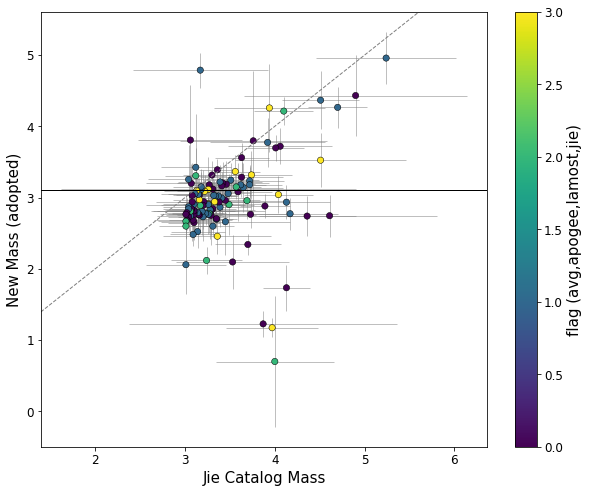

In [299]:
# plt.scatter(highmass_rc['ClcorM'],adopted_masses['corr_mass'],
#             color='tab:blue',s=40,edgecolor='k',linewidth=0.5)
plt.scatter(highmass_rc['ClcorM'],adopted_masses['corr_mass'],
            c=adopted_masses['adopt_flag_int'],s=40,edgecolor='k',linewidth=0.5,cmap='viridis')
plt.errorbar(highmass_rc['ClcorM'],adopted_masses['corr_mass'],
             xerr=highmass_rc['e_ClcorM'],yerr=adopted_masses['corr_mass_e'],
             linestyle='None',color='grey',zorder=0,alpha=0.5)
plt.axline((3, 3), slope=1,color='grey',linestyle='--') 
plt.axhline(3.1,color='k')
plt.xlabel('Jie Catalog Mass')
plt.ylabel('New Mass (adopted)')
plt.colorbar(label='flag (avg,apogee,lamost,jie)')
plt.show()

median diff -0.10659551795660828


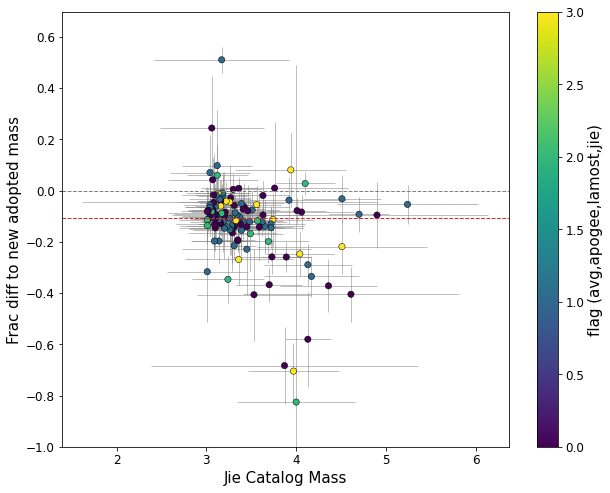

In [300]:
median_diff = np.nanmedian((adopted_masses['corr_mass']-highmass_rc['ClcorM'])/highmass_rc['ClcorM'])
print('median diff',median_diff)

# plt.scatter(highmass_rc['ClcorM'],(adopted_masses['corr_mass']-highmass_rc['ClcorM'])/highmass_rc['ClcorM'],
#             color='tab:blue',s=40,edgecolor='k',linewidth=0.5)
plt.scatter(highmass_rc['ClcorM'],(adopted_masses['corr_mass']-highmass_rc['ClcorM'])/highmass_rc['ClcorM'],
            c=adopted_masses['adopt_flag_int'],s=40,edgecolor='k',linewidth=0.5,cmap='viridis')
plt.errorbar(highmass_rc['ClcorM'],(adopted_masses['corr_mass']-highmass_rc['ClcorM'])/highmass_rc['ClcorM'],
             xerr=highmass_rc['e_ClcorM'],yerr=adopted_masses['corr_mass_e']/adopted_masses['corr_mass'],
             linestyle='None',color='grey',zorder=0,alpha=0.5)
# plt.axline((3, 3), slope=1,color='grey',linestyle='--') 
plt.axhline(0,color='grey',linestyle='--')
plt.axhline(median_diff,color='tab:red',linestyle='--')
plt.xlabel('Jie Catalog Mass')
plt.ylabel('Frac diff to new adopted mass')
plt.colorbar(label='flag (avg,apogee,lamost,jie)')
plt.ylim(bottom=-1)
plt.show()

In [301]:
sorted_masses = adopted_masses.sort_values(by=['corr_mass'],axis=0,ascending=False,ignore_index=True)
sorted_masses

KIC      fdnu uncorr_mass corr_mass corr_mass_e adopt_flag_int
0     3347458  1.026809    4.460233  4.958121     0.37024              1
1     9266192  1.036519    4.148442  4.788446    0.246859              1
2     8378545  1.026888    3.985832  4.432115    0.565633              0
3     4756133  1.032011    3.849515  4.366603    0.407963              1
4     5978324  1.023082    3.893824  4.265973      0.2893              1
..        ...       ...         ...       ...         ...            ...
110   3430048  0.989388    2.147365  2.057652     0.40593              1
111  10384595  0.984568    1.844996  1.733718    0.322569              0
112   2579142   0.97531    1.355344  1.226365    0.183271              0
113   6529078  0.999447    1.175192  1.172595    0.130511              3
114   3747623  1.009553    0.672272  0.698332    0.919913              2

[115 rows x 6 columns]

In [327]:
sorted_masses[sorted_masses['corr_mass']>3.0]

KIC      fdnu uncorr_mass corr_mass corr_mass_e adopt_flag_int
0    3347458  1.026809    4.460233  4.958121     0.37024              1
1    9266192  1.036519    4.148442  4.788446    0.246859              1
2    8378545  1.026888    3.985832  4.432115    0.565633              0
3    4756133  1.032011    3.849515  4.366603    0.407963              1
4    5978324  1.023082    3.893824  4.265973      0.2893              1
5   11518639  1.030538    3.775423  4.258156    0.616973              3
6    6599955  1.033778    3.689432  4.213744    0.194376              2
7    6382830    1.1151    2.462381  3.807248    0.772843              0
8    9612933  1.020527    3.500362  3.796738    0.974869              0
9    7988900  1.019246    3.496726  3.773793    0.344187              1
10   3955502  1.016985    3.477648  3.720004    0.254478              0
11   8569885  1.025385    3.344001  3.696699    0.177135              0
12   5097690   1.02378    3.241017  3.560478    0.203002              0
13   7175316  1.012038     3.35963  3.524354    0.382872              3
14   9846437  1.001445    3.404575  3.424297    0.749517              1
15   8230626  1.018838    3.145994  3.389828     0.14651              0
16   8525150  1.007548    3.265441  3.365151    0.239115              3
17   7971558  1.016849    3.103341  3.317834    0.338554              3
18   9468199  1.014692    3.128078  3.315993    0.199639              0
19  10621713  1.015775    3.105814  3.306478    0.387083              2
20   9286851  1.017086    3.070422  3.285706    0.206502              0
21  11045134  1.012015    3.102398  3.254201    0.481842              1
22   9245283  1.009953    3.118671  3.244696    0.239063              1
23  10094550   1.01388    3.061877   3.23544    0.221145              1
24   4348593  1.011332    3.077618  3.219513    0.237341              1
25   4940439  1.011005    3.066881  3.204136     0.29408              0
26   2845610  1.018066    2.977972  3.199072     0.26702              0
27   3120567  1.014917    3.003603  3.186878    0.322593              0
28  10736390   1.01204     3.03189  3.180559    0.245499              1
29   6866251  1.016223    2.980532    3.1787    0.172006              1
30   4372082   1.00913    3.064671  3.178131    0.125963              0
31   5307930  1.009813    3.042596  3.163793    0.193811              0
32  11456735  1.016543    2.950382  3.150514    0.256529              1
33   4562675  1.010091    3.024758  3.148714    0.176129              2
34   4370592   1.00961    3.022513  3.140383    0.337712              1
35   4273491  1.007491    3.027249   3.11898    0.156389              0
36   4060757  0.996919    3.153617  3.114929    0.447331              3
37   9786910  1.005464     3.04447  3.111557    0.240407              1
38  12020628  1.021691     2.84306  3.097876    0.253369              3
39  10809272   1.02392    2.809157  3.087734    0.235532              3
40   5106376  1.008666    2.975593  3.080088    0.407289              0
41  10322513  1.015884    2.870901  3.057704    0.146705              1
42   8395466  1.018005    2.844005  3.054429     0.25593              1
43   4940935  1.012446    2.897592  3.044556    0.229066              1
44   8037930  1.013202    2.885792  3.041234     0.26362              3
45   7581399  1.012243    2.889342  3.033464    0.241759              0
46  11044315  1.009595    2.916947   3.03052    0.214772              1
47   5707338  1.010741    2.902096  3.028803    0.156618              0
48  11235672  1.008602    2.920717  3.022514    0.157129              1
49  11413158  1.004681    2.966265  3.022196    0.175566              1

In [339]:
sample_mask = np.logical_and(adopted_masses['corr_mass']>3.0,highmass_rc_newvals['pysyd_numax']>20)

In [340]:
highmass_rc_newvals[sample_mask]

KIC   numax  pysyd_numax  e_pysyd_numax  new_numax  smooth_numax  \
0     3347458   39.99    40.291621       0.904390      40.32     41.422682   
1     8378545   48.82    47.769061       1.989659      48.07     48.952072   
2     5978324   49.10    48.776551       0.974408      48.78     50.072904   
4     4756133   80.81    80.362852       2.357250      80.29     83.967767   
5     7175316   43.30    41.488007       1.347833      41.48     46.349133   
10    6599955   76.50    75.711091       1.026921      75.71     77.038927   
11    3955502   24.68    24.714563       0.349394      24.71     24.991359   
12    8037930   58.35    54.421681       1.223287      54.43     56.769097   
13    8569885   45.32    44.927632       0.548469      44.92     45.691119   
16   11518639   53.79    56.149591       2.472191      56.15     58.672391   
17    7988900   47.30    47.737578       1.306990      48.45     49.746256   
20    9612933   54.05    52.468043       4.463604      49.69     58.244565   
21    7971558   28.59    28.107319       0.735182      28.11     29.231297   
23   10094550   57.29    56.474378       1.114442      56.48     58.495649   
24   10736390   74.32    71.814942       1.633737      71.83     74.979082   
27    4370592   50.38    50.026897       1.698416      50.52     52.653427   
28    5097690   59.23    59.040327       0.939399      59.08     60.952192   
29    9286851   86.98    85.494732       1.674581      84.19     88.299954   
30    6866251   94.81    94.231540       1.207799      94.57     96.835264   
31    5106376   63.66    61.692853       2.672328      61.72     66.745244   
32    4562675   66.14    65.282026       1.126112      65.64     68.202165   
33    8525150   71.39    71.689011       1.324494      71.05     74.724854   
35    9245283   42.34    42.314462       0.898556      42.70     43.876067   
37   10322513   92.47    92.295265       0.916060      92.29     94.497569   
38    3120567   65.72    65.171834       2.129694      65.19     71.522152   
41    4940439   72.91    72.239986       2.164702      72.76     75.397042   
42    5307930   51.80    51.208689       0.974408      51.21     53.609342   
44    4348593   61.36    61.700723       1.306990      61.29     61.855782   
47   11235672   74.43    73.814172       0.974408      73.71     76.243161   
48    8230626  110.52   109.619067       1.408099     109.75    113.307715   
52   11413158   59.15    59.048191       0.951068      59.06     60.888429   
54   11044315   62.42    61.677103       1.137781      61.68     63.970711   
56    4273491   71.55    70.225012       1.079434      70.21     72.699652   
58    9468199   57.33    57.544834       1.085268      57.54     59.655834   
62    4372082   79.37    79.378978       0.548469      79.38     81.156248   
70   10809272   59.47    59.063920       1.128700      59.08     61.564303   
75    9786910   22.72    22.361493       0.315078      22.35     22.773933   
76   11456735   90.94    90.280291       2.240554      90.28     95.782115   
78    9266192   78.30    88.658869       1.207799      87.63     89.541994   
80    7581399   84.85    83.282982       2.112189      83.25     87.319227   
82    4940935   40.49    39.937425       0.816869      39.93     41.820167   
86   12020628   89.82    88.414864       1.907972      88.43     92.782478   
88   10621713   33.54    34.866793       1.282736      34.87     36.364918   
90    8395466   68.61    67.367836       1.732929      67.38     70.820841   
98    5707338   81.89    80.646206       1.236973      79.72     82.902033   
99    2845610   91.65    92.311022       2.473945      91.13     95.995435   
103   6382830   24.45    22.928206       1.540381      22.94     25.531931   
108  11045134   47.12    49.839129       2.368919      47.12     55.068617   

     Delnu  pysyd_dnu  e_pysyd_dnu  o_Teff  ...  L_[Fe/H]  L_[Fe/H]_e  \
0    3.360   3.362861     0.016179    5000  ...       NaN         NaN   
1    3.952   3.966159     0.022203    505

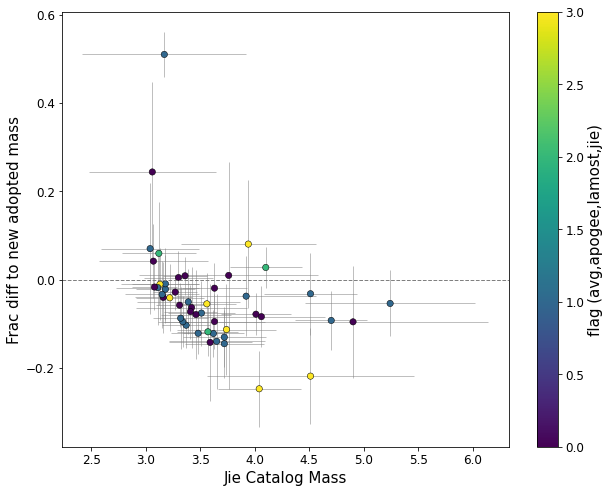

In [341]:
# plt.scatter(highmass_rc['ClcorM'][sample_mask],(adopted_masses['corr_mass'][sample_mask]-highmass_rc['ClcorM'][sample_mask])/highmass_rc['ClcorM'][sample_mask],
#             color='tab:blue',s=40,edgecolor='k',linewidth=0.5)
plt.scatter(highmass_rc['ClcorM'][sample_mask],(adopted_masses['corr_mass'][sample_mask]-highmass_rc['ClcorM'][sample_mask])/highmass_rc['ClcorM'][sample_mask],
            c=adopted_masses['adopt_flag_int'][sample_mask],s=40,edgecolor='k',linewidth=0.5,cmap='viridis')
plt.errorbar(highmass_rc['ClcorM'][sample_mask],
             (adopted_masses['corr_mass'][sample_mask]-highmass_rc['ClcorM'][sample_mask])/highmass_rc['ClcorM'][sample_mask],
             xerr=highmass_rc['e_ClcorM'][sample_mask],
             yerr=adopted_masses['corr_mass_e'][sample_mask]/adopted_masses['corr_mass'][sample_mask],
             linestyle='None',color='grey',zorder=0,alpha=0.5)
# plt.axline((3, 3), slope=1,color='grey',linestyle='--') 
plt.axhline(0,color='grey',linestyle='--')
plt.xlabel('Jie Catalog Mass')
plt.ylabel('Frac diff to new adopted mass')
plt.colorbar(label='flag (avg,apogee,lamost,jie)')
# plt.ylim(bottom=-1)
plt.show()

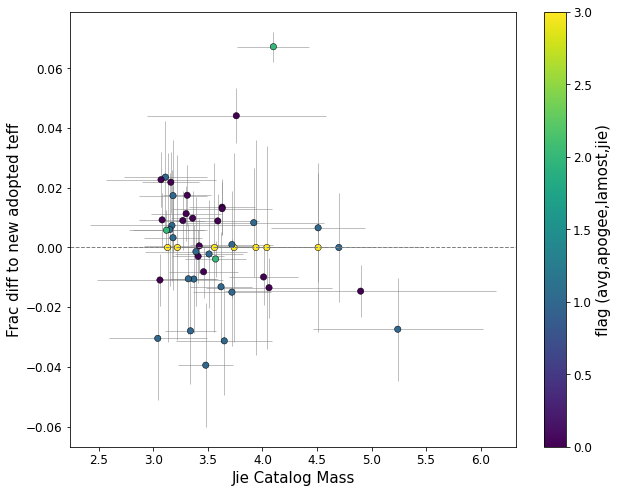

In [342]:
# plt.scatter(highmass_rc['ClcorM'][sample_mask],(adopted_masses['corr_mass'][sample_mask]-highmass_rc['ClcorM'][sample_mask])/highmass_rc['ClcorM'][sample_mask],
#             color='tab:blue',s=40,edgecolor='k',linewidth=0.5)
plt.scatter(highmass_rc['ClcorM'][sample_mask],
            (highmass_rc_newvals['Teff_adopt'][sample_mask]-highmass_rc_newvals['o_Teff'][sample_mask])/highmass_rc_newvals['o_Teff'][sample_mask],
            c=adopted_masses['adopt_flag_int'][sample_mask],s=40,edgecolor='k',linewidth=0.5,cmap='viridis')
plt.errorbar(highmass_rc['ClcorM'][sample_mask],
             (highmass_rc_newvals['Teff_adopt'][sample_mask]-highmass_rc_newvals['o_Teff'][sample_mask])/highmass_rc_newvals['o_Teff'][sample_mask],
             xerr=highmass_rc['e_ClcorM'][sample_mask],
             yerr=highmass_rc_newvals['Teff_e_adopt'][sample_mask]/highmass_rc_newvals['Teff_adopt'][sample_mask],
             linestyle='None',color='grey',zorder=0,alpha=0.5)
# plt.axline((3, 3), slope=1,color='grey',linestyle='--') 
plt.axhline(0,color='grey',linestyle='--')
plt.xlabel('Jie Catalog Mass')
plt.ylabel('Frac diff to new adopted teff')
plt.colorbar(label='flag (avg,apogee,lamost,jie)')
# plt.ylim(bottom=-1)
plt.show()

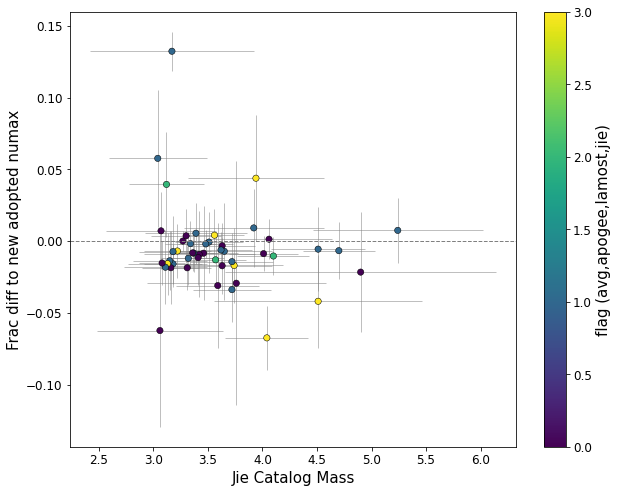

In [343]:
# plt.scatter(highmass_rc['ClcorM'][sample_mask],(adopted_masses['corr_mass'][sample_mask]-highmass_rc['ClcorM'][sample_mask])/highmass_rc['ClcorM'][sample_mask],
#             color='tab:blue',s=40,edgecolor='k',linewidth=0.5)
plt.scatter(highmass_rc['ClcorM'][sample_mask],
            (highmass_rc_newvals['pysyd_numax'][sample_mask]-highmass_rc['numax'][sample_mask])/highmass_rc['numax'][sample_mask],
            c=adopted_masses['adopt_flag_int'][sample_mask],s=40,edgecolor='k',linewidth=0.5,cmap='viridis')
plt.errorbar(highmass_rc['ClcorM'][sample_mask],
             (highmass_rc_newvals['pysyd_numax'][sample_mask]-highmass_rc['numax'][sample_mask])/highmass_rc['numax'][sample_mask],
             xerr=highmass_rc['e_ClcorM'][sample_mask],
             yerr=highmass_rc_newvals['e_pysyd_numax'][sample_mask]/highmass_rc_newvals['pysyd_numax'][sample_mask],
             linestyle='None',color='grey',zorder=0,alpha=0.5)
# plt.axline((3, 3), slope=1,color='grey',linestyle='--') 
plt.axhline(0,color='grey',linestyle='--')
plt.xlabel('Jie Catalog Mass')
plt.ylabel('Frac diff to new adopted numax')
plt.colorbar(label='flag (avg,apogee,lamost,jie)')
# plt.ylim(bottom=-1)
plt.show()

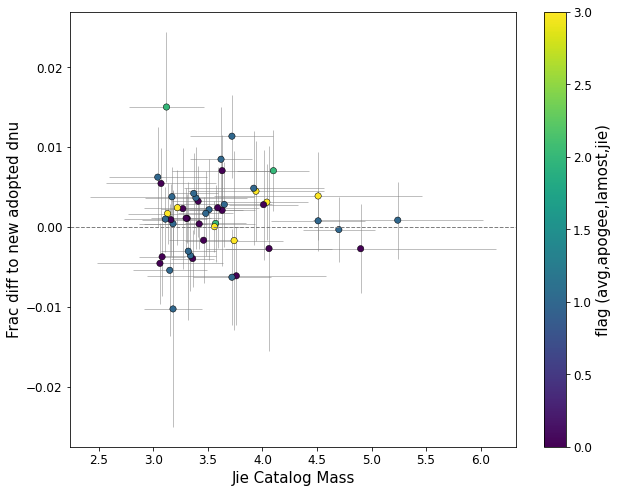

In [344]:
# plt.scatter(highmass_rc['ClcorM'][sample_mask],(adopted_masses['corr_mass'][sample_mask]-highmass_rc['ClcorM'][sample_mask])/highmass_rc['ClcorM'][sample_mask],
#             color='tab:blue',s=40,edgecolor='k',linewidth=0.5)
plt.scatter(highmass_rc['ClcorM'][sample_mask],
            (highmass_rc_newvals['pysyd_dnu'][sample_mask]-highmass_rc['Delnu'][sample_mask])/highmass_rc['Delnu'][sample_mask],
            c=adopted_masses['adopt_flag_int'][sample_mask],s=40,edgecolor='k',linewidth=0.5,cmap='viridis')
plt.errorbar(highmass_rc['ClcorM'][sample_mask],
             (highmass_rc_newvals['pysyd_dnu'][sample_mask]-highmass_rc['Delnu'][sample_mask])/highmass_rc['Delnu'][sample_mask],
             xerr=highmass_rc['e_ClcorM'][sample_mask],
             yerr=highmass_rc_newvals['e_pysyd_dnu'][sample_mask]/highmass_rc_newvals['pysyd_dnu'][sample_mask],
             linestyle='None',color='grey',zorder=0,alpha=0.5)
# plt.axline((3, 3), slope=1,color='grey',linestyle='--') 
plt.axhline(0,color='grey',linestyle='--')
plt.xlabel('Jie Catalog Mass')
plt.ylabel('Frac diff to new adopted dnu')
plt.colorbar(label='flag (avg,apogee,lamost,jie)')
plt.ylim()
# plt.ylim(bottom=-1)
plt.show()

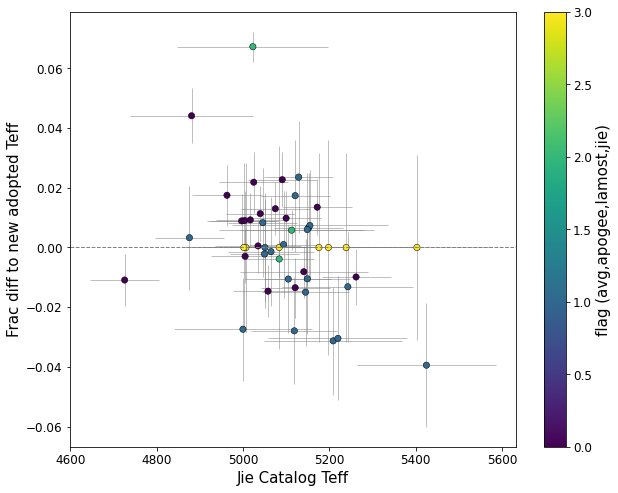

In [345]:
plt.scatter(highmass_rc_newvals['o_Teff'][sample_mask],
            (highmass_rc_newvals['Teff_adopt'][sample_mask]-highmass_rc_newvals['o_Teff'][sample_mask])/highmass_rc_newvals['o_Teff'][sample_mask],
            c=adopted_masses['adopt_flag_int'][sample_mask],s=40,edgecolor='k',linewidth=0.5,cmap='viridis')
plt.errorbar(highmass_rc_newvals['o_Teff'][sample_mask],
            (highmass_rc_newvals['Teff_adopt'][sample_mask]-highmass_rc_newvals['o_Teff'][sample_mask])/highmass_rc_newvals['o_Teff'][sample_mask],
             xerr=highmass_rc['e_Teff'][sample_mask],
             yerr=highmass_rc_newvals['Teff_e_adopt'][sample_mask]/highmass_rc_newvals['Teff_adopt'][sample_mask],
             linestyle='None',color='grey',zorder=0,alpha=0.5)
plt.axhline(0,color='grey',linestyle='--')
plt.xlabel('Jie Catalog Teff')
plt.ylabel('Frac diff to new adopted Teff')
plt.colorbar(label='flag (avg,apogee,lamost,jie)')
# plt.ylim(bottom=-1)
plt.show()

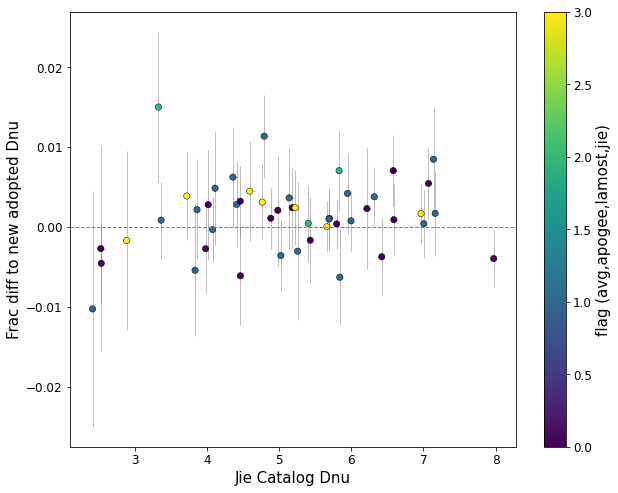

In [346]:
plt.scatter(highmass_rc['Delnu'][sample_mask],
            (highmass_rc_newvals['pysyd_dnu'][sample_mask]-highmass_rc['Delnu'][sample_mask])/highmass_rc['Delnu'][sample_mask],
            c=adopted_masses['adopt_flag_int'][sample_mask],s=40,edgecolor='k',linewidth=0.5,cmap='viridis')
plt.errorbar(highmass_rc['Delnu'][sample_mask],
            (highmass_rc_newvals['pysyd_dnu'][sample_mask]-highmass_rc['Delnu'][sample_mask])/highmass_rc['Delnu'][sample_mask],
             xerr=highmass_rc['e_Delnu'][sample_mask],
             yerr=highmass_rc_newvals['e_pysyd_dnu'][sample_mask]/highmass_rc_newvals['pysyd_dnu'][sample_mask],
             linestyle='None',color='grey',zorder=0,alpha=0.5)
plt.axhline(0,color='grey',linestyle='--')
plt.xlabel('Jie Catalog Dnu')
plt.ylabel('Frac diff to new adopted Dnu')
plt.colorbar(label='flag (avg,apogee,lamost,jie)')
# plt.ylim(bottom=-1)
plt.show()

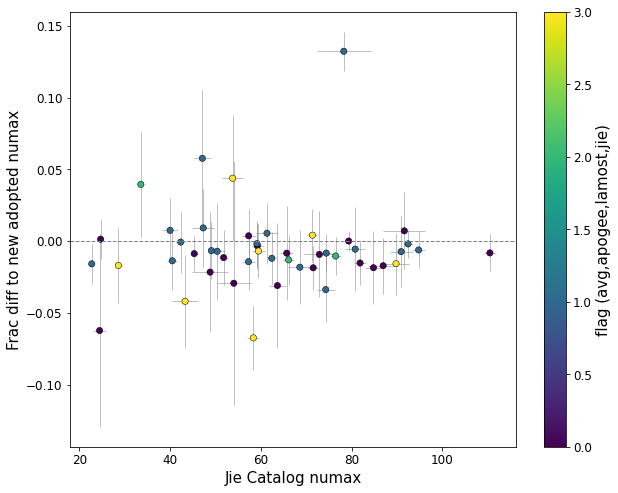

In [347]:
plt.scatter(highmass_rc['numax'][sample_mask],
            (highmass_rc_newvals['pysyd_numax'][sample_mask]-highmass_rc['numax'][sample_mask])/highmass_rc['numax'][sample_mask],
            c=adopted_masses['adopt_flag_int'][sample_mask],s=40,edgecolor='k',linewidth=0.5,cmap='viridis')
plt.errorbar(highmass_rc['numax'][sample_mask],
            (highmass_rc_newvals['pysyd_numax'][sample_mask]-highmass_rc['numax'][sample_mask])/highmass_rc['numax'][sample_mask],
             xerr=highmass_rc['e_numax'][sample_mask],
             yerr=highmass_rc_newvals['e_pysyd_numax'][sample_mask]/highmass_rc_newvals['pysyd_numax'][sample_mask],
             linestyle='None',color='grey',zorder=0,alpha=0.5)
plt.axhline(0,color='grey',linestyle='--')
plt.xlabel('Jie Catalog numax')
plt.ylabel('Frac diff to new adopted numax')
plt.colorbar(label='flag (avg,apogee,lamost,jie)')
# plt.ylim(bottom=-1)
plt.show()

In [348]:
# plt.scatter(highmass_rc_newvals['Teff_adopt'][sample_mask],adopted_masses['corr_mass'][sample_mask],
#             c=adopted_masses['adopt_flag_int'][sample_mask],s=40,edgecolor='k',linewidth=0.5,cmap='viridis')
# plt.errorbar(highmass_rc_newvals['Teff_adopt'][sample_mask],adopted_masses['corr_mass'][sample_mask],
#              xerr=highmass_rc_newvals['Teff_e_adopt'][sample_mask],
#              yerr=adopted_masses['corr_mass_e'][sample_mask],
#              linestyle='None',color='grey',zorder=0,alpha=0.5)
# # plt.axhline(0,color='grey',linestyle='--')
# plt.ylabel('new adopted mass')
# plt.xlabel('adopted Teff')
# plt.colorbar(label='flag (avg,apogee,lamost,jie)')
# # plt.ylim(bottom=-1)
# plt.show()

In [349]:
plt.scatter(adopted_masses['corr_mass'][sample_mask],highmass_rc_newvals['Teff_adopt'][sample_mask],
            c=adopted_masses['adopt_flag_int'][sample_mask],s=40,edgecolor='k',linewidth=0.5,cmap='viridis')
plt.errorbar(adopted_masses['corr_mass'][sample_mask],highmass_rc_newvals['Teff_adopt'][sample_mask],
             xerr=adopted_masses['corr_mass_e'][sample_mask],
             yerr=highmass_rc_newvals['Teff_e_adopt'][sample_mask],
             linestyle='None',color='grey',zorder=0,alpha=0.5)
# plt.axhline(0,color='grey',linestyle='--')
plt.xlabel('new adopted mass')
plt.ylabel('adopted Teff')
plt.colorbar(label='flag (avg,apogee,lamost,jie)')
# plt.ylim(bottom=-1)
plt.show()

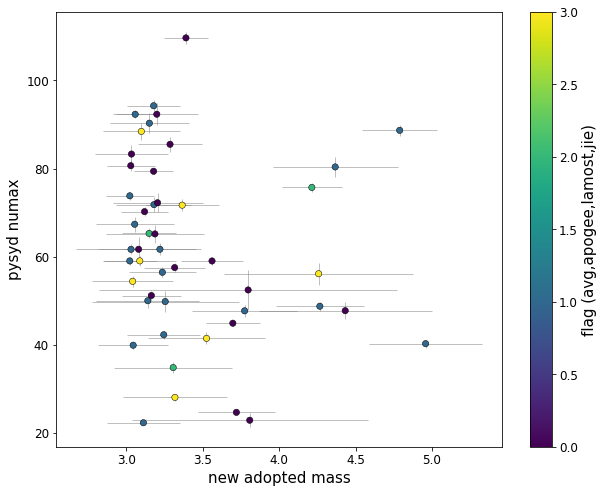

In [350]:
plt.scatter(adopted_masses['corr_mass'][sample_mask],highmass_rc_newvals['pysyd_numax'][sample_mask],
            c=adopted_masses['adopt_flag_int'][sample_mask],s=40,edgecolor='k',linewidth=0.5,cmap='viridis')
plt.errorbar(adopted_masses['corr_mass'][sample_mask],highmass_rc_newvals['pysyd_numax'][sample_mask],
             xerr=adopted_masses['corr_mass_e'][sample_mask],
             yerr=highmass_rc_newvals['e_pysyd_numax'][sample_mask],
             linestyle='None',color='grey',zorder=0,alpha=0.5)
# plt.axhline(0,color='grey',linestyle='--')
plt.xlabel('new adopted mass')
plt.ylabel('pysyd numax')
plt.colorbar(label='flag (avg,apogee,lamost,jie)')
# plt.ylim(bottom=-1)
plt.show()

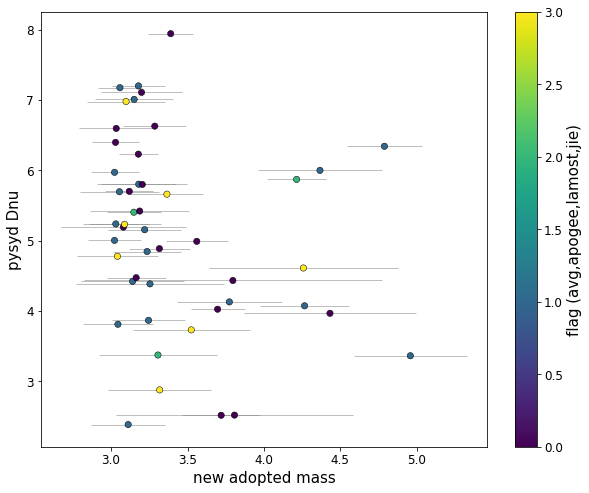

In [351]:
plt.scatter(adopted_masses['corr_mass'][sample_mask],highmass_rc_newvals['pysyd_dnu'][sample_mask],
            c=adopted_masses['adopt_flag_int'][sample_mask],s=40,edgecolor='k',linewidth=0.5,cmap='viridis')
plt.errorbar(adopted_masses['corr_mass'][sample_mask],highmass_rc_newvals['pysyd_dnu'][sample_mask],
             xerr=adopted_masses['corr_mass_e'][sample_mask],
             yerr=highmass_rc_newvals['e_pysyd_dnu'][sample_mask],
             linestyle='None',color='grey',zorder=0,alpha=0.5)
# plt.axhline(0,color='grey',linestyle='--')
plt.xlabel('new adopted mass')
plt.ylabel('pysyd Dnu')
plt.colorbar(label='flag (avg,apogee,lamost,jie)')
# plt.ylim(bottom=-1)
plt.show()

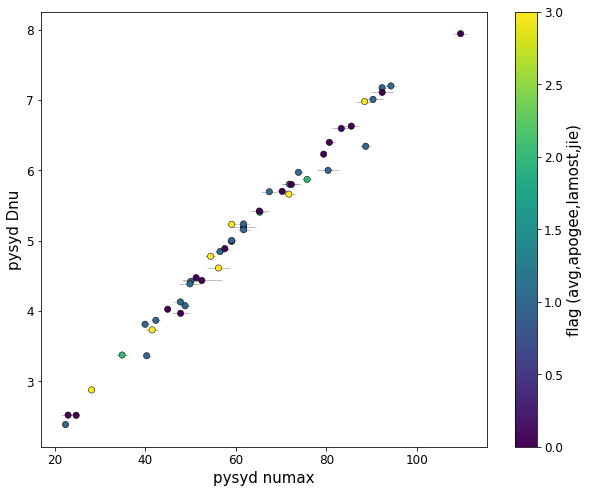

In [352]:
plt.scatter(highmass_rc_newvals['pysyd_numax'][sample_mask],highmass_rc_newvals['pysyd_dnu'][sample_mask],
            c=adopted_masses['adopt_flag_int'][sample_mask],s=40,edgecolor='k',linewidth=0.5,cmap='viridis')
plt.errorbar(highmass_rc_newvals['pysyd_numax'][sample_mask],highmass_rc_newvals['pysyd_dnu'][sample_mask],
             xerr=highmass_rc_newvals['e_pysyd_numax'][sample_mask],
             yerr=highmass_rc_newvals['e_pysyd_dnu'][sample_mask],
             linestyle='None',color='grey',zorder=0,alpha=0.5)
# plt.axhline(0,color='grey',linestyle='--')
plt.xlabel('pysyd numax')
plt.ylabel('pysyd Dnu')
plt.colorbar(label='flag (avg,apogee,lamost,jie)')
# plt.ylim(bottom=-1)
plt.show()

In [353]:
plt.scatter(highmass_rc_newvals['pysyd_numax'][sample_mask],highmass_rc_newvals['Teff_adopt'][sample_mask],
            c=adopted_masses['adopt_flag_int'][sample_mask],s=40,edgecolor='k',linewidth=0.5,cmap='viridis')
plt.errorbar(highmass_rc_newvals['pysyd_numax'][sample_mask],highmass_rc_newvals['Teff_adopt'][sample_mask],
             xerr=highmass_rc_newvals['e_pysyd_numax'][sample_mask],
             yerr=highmass_rc_newvals['Teff_e_adopt'][sample_mask],
             linestyle='None',color='grey',zorder=0,alpha=0.5)
# plt.axhline(0,color='grey',linestyle='--')
plt.xlabel('pysyd numax')
plt.ylabel('adopted Teff')
plt.colorbar(label='flag (avg,apogee,lamost,jie)')
# plt.ylim(bottom=-1)
plt.show()

In [354]:
plt.scatter(highmass_rc_newvals['pysyd_numax'][sample_mask],highmass_rc_newvals['log(g)_adopt'][sample_mask],
            c=adopted_masses['adopt_flag_int'][sample_mask],s=40,edgecolor='k',linewidth=0.5,cmap='viridis')
plt.errorbar(highmass_rc_newvals['pysyd_numax'][sample_mask],highmass_rc_newvals['log(g)_adopt'][sample_mask],
             xerr=highmass_rc_newvals['e_pysyd_numax'][sample_mask],
             yerr=highmass_rc_newvals['log(g)_e_adopt'][sample_mask],
             linestyle='None',color='grey',zorder=0,alpha=0.5)
# plt.axhline(0,color='grey',linestyle='--')
plt.xlabel('pysyd numax')
plt.ylabel('adopted log(g)')
plt.colorbar(label='flag (avg,apogee,lamost,jie)')
# plt.ylim(bottom=-1)
plt.show()

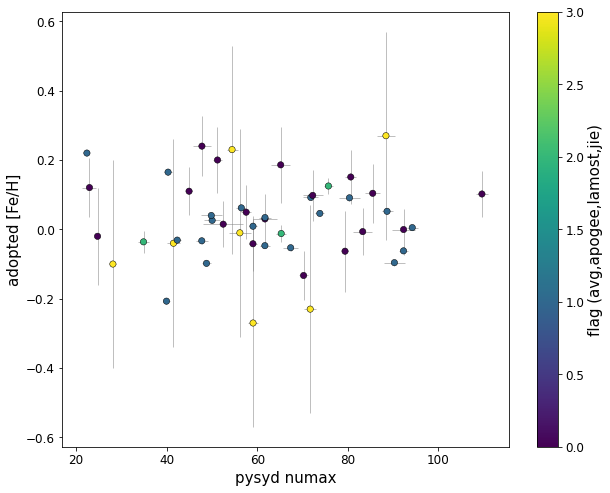

In [355]:
plt.scatter(highmass_rc_newvals['pysyd_numax'][sample_mask],highmass_rc_newvals['feh_adopt'][sample_mask],
            c=adopted_masses['adopt_flag_int'][sample_mask],s=40,edgecolor='k',linewidth=0.5,cmap='viridis')
plt.errorbar(highmass_rc_newvals['pysyd_numax'][sample_mask],highmass_rc_newvals['feh_adopt'][sample_mask],
             xerr=highmass_rc_newvals['e_pysyd_numax'][sample_mask],
             yerr=highmass_rc_newvals['feh_e_adopt'][sample_mask],
             linestyle='None',color='grey',zorder=0,alpha=0.5)
# plt.axhline(0,color='grey',linestyle='--')
plt.xlabel('pysyd numax')
plt.ylabel('adopted [Fe/H]')
plt.colorbar(label='flag (avg,apogee,lamost,jie)')
# plt.ylim(bottom=-1)
plt.show()

In [356]:
track_4m = pd.read_csv('../datatables/4M_track.csv')
track_35m = pd.read_csv('../datatables/3.5M_track.csv')
track_3m = pd.read_csv('../datatables/3M_track.csv')
track_25m = pd.read_csv('../datatables/2.5M_track.csv')

In [366]:
# track_4m

In [358]:
sigma = 5.67e-5
G = 6.67e-8
solar_mass = 1.989e33
solar_lum = 3.839e33
logg_4m = np.log10((4*np.pi*sigma*G*(4*solar_mass)*(10**(track_4m['log_Teff']))**4)/(10**(track_4m['log_L'])*solar_lum))
logg_35m = np.log10((4*np.pi*sigma*G*(4*solar_mass)*(10**(track_35m['log_Teff']))**4)/(10**(track_35m['log_L'])*solar_lum))
logg_3m = np.log10((4*np.pi*sigma*G*(4*solar_mass)*(10**(track_3m['log_Teff']))**4)/(10**(track_3m['log_L'])*solar_lum))
logg_25m = np.log10((4*np.pi*sigma*G*(4*solar_mass)*(10**(track_25m['log_Teff']))**4)/(10**(track_25m['log_L'])*solar_lum))


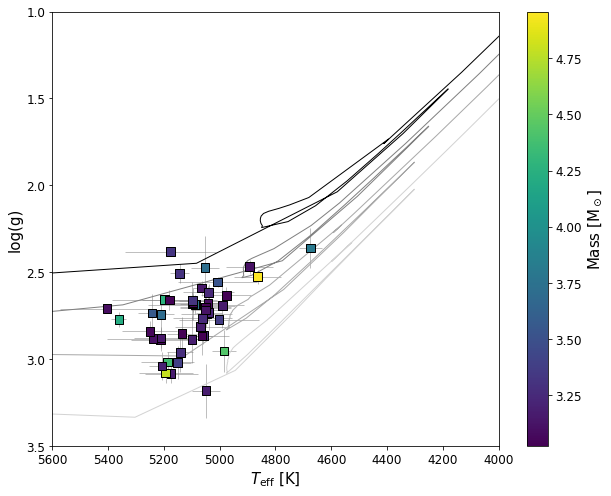

In [365]:
plt.plot(10**track_4m['log_Teff'][10:],logg_4m[10:],
         label=r'4.0 M$_\odot$',linestyle='-',c='k')
plt.plot(10**track_35m['log_Teff'][10:],logg_35m[10:],
         label=r'3.5 M$_\odot$',linestyle='-',c='grey')
plt.plot(10**track_3m['log_Teff'][10:],logg_3m[10:],
         label=r'3.0 M$_\odot$',linestyle='-',c='darkgrey')
plt.plot(10**track_25m['log_Teff'][10:],logg_25m[10:],
         label=r'2.5 M$_\odot$',linestyle='-',c='lightgrey')
# plt.annotate(r'4.0 M$_\odot$',xy=(5560,10**(1.52)),annotation_clip=False)
# plt.annotate(r'3.5 M$_\odot$',xy=(5560,10**(1.69)),annotation_clip=False)
# plt.annotate(r'3.0 M$_\odot$',xy=(5560,10**(1.9)),annotation_clip=False)
# plt.annotate(r'2.5 M$_\odot$',xy=(5560,10**(2.15)),annotation_clip=False)

plt.scatter(highmass_rc_newvals['Teff_adopt'][sample_mask],highmass_rc_newvals['log(g)_adopt'][sample_mask],
            c=adopted_masses['corr_mass'][sample_mask],
#             c=adopted_masses['adopt_flag_int'][sample_mask],
            zorder=3,marker='s',s=75,alpha=1,edgecolor='k',linewidth=1,cmap='viridis')
plt.errorbar(highmass_rc_newvals['Teff_adopt'][sample_mask],highmass_rc_newvals['log(g)_adopt'][sample_mask],
             xerr=highmass_rc_newvals['Teff_e_adopt'][sample_mask],
             yerr=highmass_rc_newvals['log(g)_e_adopt'][sample_mask],
             linestyle='None',color='grey',zorder=0,alpha=0.5)
# plt.axhline(0,color='grey',linestyle='--')
plt.xlabel(r'$T_{\rm{eff}}$ [K]')
plt.ylabel(r'log(g)')
plt.colorbar(label=r'Mass [M$_\odot$]')
plt.xlim(5600,4000)
plt.ylim(1.0,3.5)
# plt.ylim(10**(2.5),10**(1))
# plt.yscale('log')
plt.gca().invert_yaxis()
# plt.gca().invert_xaxis()
# plt.ylim(bottom=-1)
# plt.savefig('/Users/ccra8514/Desktop/highmass_tracks',dpi=300,bbox_inches='tight')
plt.show()

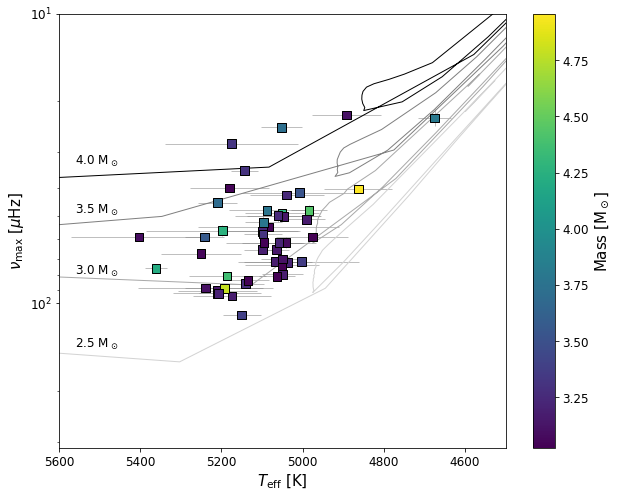

In [361]:
plt.plot(10**track_4m['log_Teff'][10:],track_4m['nu_max'][10:],
         label=r'4.0 M$_\odot$',linestyle='-',c='k')
plt.plot(10**track_35m['log_Teff'][10:],track_35m['nu_max'][10:],
         label=r'3.5 M$_\odot$',linestyle='-',c='grey')
plt.plot(10**track_3m['log_Teff'][10:],track_3m['nu_max'][10:],
         label=r'3.0 M$_\odot$',linestyle='-',c='darkgrey')
plt.plot(10**track_25m['log_Teff'][10:],track_25m['nu_max'][10:],
         label=r'2.5 M$_\odot$',linestyle='-',c='lightgrey')
plt.annotate(r'4.0 M$_\odot$',xy=(5560,10**(1.52)),annotation_clip=False)
plt.annotate(r'3.5 M$_\odot$',xy=(5560,10**(1.69)),annotation_clip=False)
plt.annotate(r'3.0 M$_\odot$',xy=(5560,10**(1.9)),annotation_clip=False)
plt.annotate(r'2.5 M$_\odot$',xy=(5560,10**(2.15)),annotation_clip=False)

plt.scatter(highmass_rc_newvals['Teff_adopt'][sample_mask],highmass_rc_newvals['pysyd_numax'][sample_mask],
            c=adopted_masses['corr_mass'][sample_mask],
            zorder=3,marker='s',s=75,alpha=1,edgecolor='k',linewidth=1,cmap='viridis')
plt.errorbar(highmass_rc_newvals['Teff_adopt'][sample_mask],highmass_rc_newvals['pysyd_numax'][sample_mask],
             xerr=highmass_rc_newvals['Teff_e_adopt'][sample_mask],
             yerr=highmass_rc_newvals['e_pysyd_numax'][sample_mask],
             linestyle='None',color='grey',zorder=0,alpha=0.5)
# plt.axhline(0,color='grey',linestyle='--')
plt.xlabel(r'$T_{\rm{eff}}$ [K]')
plt.ylabel(r'$\nu_{\rm max}$ [$\mu$Hz]')
plt.colorbar(label=r'Mass [M$_\odot$]')
plt.xlim(5600,4500)
plt.ylim(10**(2.5),10**(1))
plt.yscale('log')
# plt.gca().invert_yaxis()
# plt.gca().invert_xaxis()
# plt.ylim(bottom=-1)
# plt.savefig('/Users/ccra8514/Desktop/highmass_tracks',dpi=300,bbox_inches='tight')
plt.show()

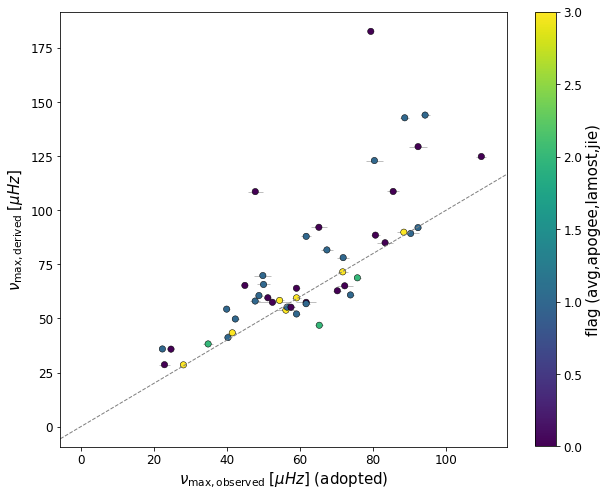

In [362]:
nu_max_solar = 3090 #uHz
delta_nu_solar = 135.1 #uHz
log_g_solar = 4.4378
g_solar = 27400 #cm/s
teff_solar = 5777 #K

numax_derived = []
for i in range(0,len(highmass_rc)):
    derived_numax = (10**(highmass_rc_newvals['log(g)_adopt'][i])/g_solar)/np.sqrt(highmass_rc_newvals['Teff_adopt'][i]/teff_solar)
    derived_numax = derived_numax*nu_max_solar
    numax_derived.append(derived_numax)
numax_derived = np.asarray(numax_derived)
plt.scatter(highmass_rc_newvals['pysyd_numax'][sample_mask],numax_derived[sample_mask],
            c=adopted_masses['adopt_flag_int'][sample_mask],s=40,edgecolor='k',linewidth=0.5,cmap='viridis')
plt.errorbar(highmass_rc_newvals['pysyd_numax'][sample_mask],numax_derived[sample_mask],
             xerr=highmass_rc_newvals['e_pysyd_numax'][sample_mask],
#              yerr=highmass_rc_newvals['e_pysyd_numax'][sample_mask],
             linestyle='None',color='grey',zorder=0,alpha=0.5)


plt.xlabel(r'$\nu_{\rm max,observed} \; [\mu Hz]$ (adopted)',fontsize=15)
plt.ylabel(r'$\nu_{\rm max,derived} \; [\mu Hz]$',fontsize=15)
plt.axline((0,0), slope=1,color='grey',linestyle='--')
plt.colorbar(label='flag (avg,apogee,lamost,jie)')
plt.show()

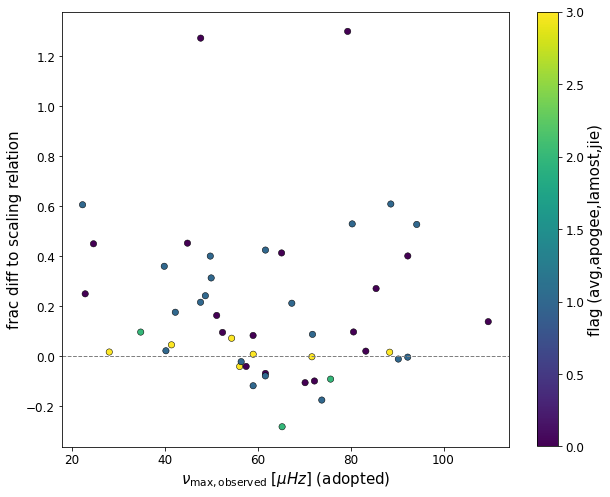

In [363]:
plt.scatter(highmass_rc_newvals['pysyd_numax'][sample_mask],
            (numax_derived[sample_mask]-highmass_rc_newvals['pysyd_numax'][sample_mask])/highmass_rc_newvals['pysyd_numax'][sample_mask],
            c=adopted_masses['adopt_flag_int'][sample_mask],s=40,edgecolor='k',linewidth=0.5,cmap='viridis')
plt.errorbar(highmass_rc_newvals['pysyd_numax'][sample_mask],
             (numax_derived[sample_mask]-highmass_rc_newvals['pysyd_numax'][sample_mask])/highmass_rc_newvals['pysyd_numax'][sample_mask],
             xerr=highmass_rc_newvals['e_pysyd_numax'][sample_mask]/highmass_rc_newvals['pysyd_numax'][sample_mask],
#              yerr=highmass_rc_newvals['e_pysyd_numax'][sample_mask],
             linestyle='None',color='grey',zorder=0,alpha=0.5)


plt.xlabel(r'$\nu_{\rm max,observed} \; [\mu Hz]$ (adopted)',fontsize=15)
plt.ylabel(r'frac diff to scaling relation',fontsize=15)
plt.axhline(0,color='grey',linestyle='--')
plt.colorbar(label='flag (avg,apogee,lamost,jie)')
plt.show()

# Separated by survey

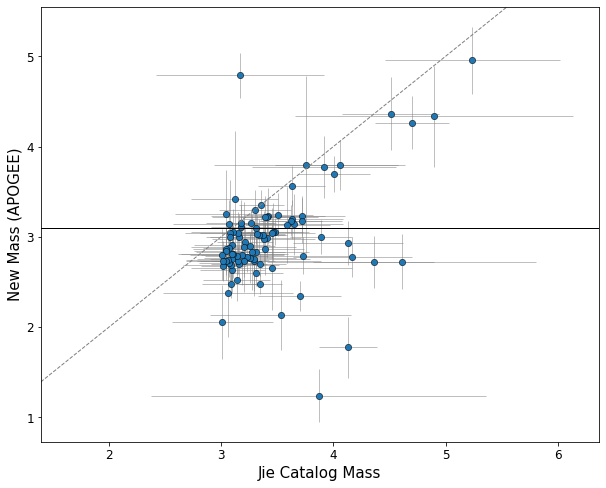

In [54]:
plt.scatter(highmass_rc['ClcorM'],adjusted_masses['a_corr_mass'],
            color='tab:blue',s=40,edgecolor='k',linewidth=0.5,label='APOGEE')
plt.errorbar(highmass_rc['ClcorM'],adjusted_masses['a_corr_mass'],
             xerr=highmass_rc['e_ClcorM'],yerr=adjusted_masses['a_corr_mass_e'],
             linestyle='None',color='grey',zorder=0,alpha=0.5)
plt.axline((3, 3), slope=1,color='grey',linestyle='--') 
plt.axhline(3.1,color='k')
plt.xlabel('Jie Catalog Mass')
plt.ylabel('New Mass (APOGEE)')
plt.show()

median diff -0.11303387354784612


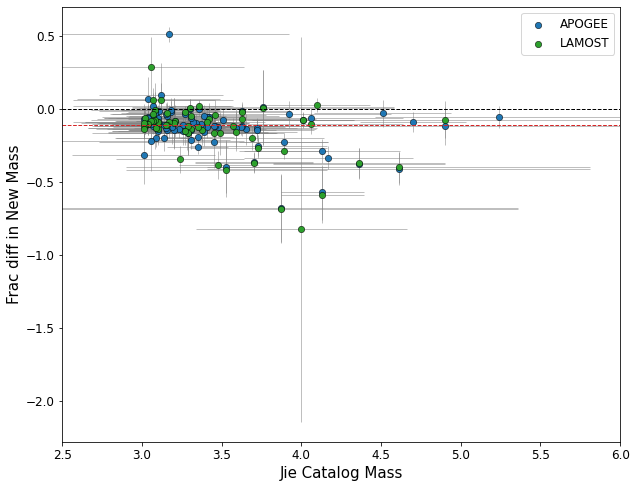

In [55]:
median_diff = np.nanmedian((adjusted_masses['a_corr_mass']-highmass_rc['ClcorM'])/highmass_rc['ClcorM'])
print('median diff',median_diff)

plt.scatter(highmass_rc['ClcorM'],(adjusted_masses['a_corr_mass']-highmass_rc['ClcorM'])/highmass_rc['ClcorM'],
            color='tab:blue',s=40,edgecolor='k',linewidth=0.5,label='APOGEE')
plt.errorbar(highmass_rc['ClcorM'],(adjusted_masses['a_corr_mass']-highmass_rc['ClcorM'])/highmass_rc['ClcorM'],
             xerr=highmass_rc['e_ClcorM'],yerr=adjusted_masses['a_corr_mass_e']/adjusted_masses['a_corr_mass'],
             linestyle='None',color='grey',zorder=0,alpha=0.5)
plt.scatter(highmass_rc['ClcorM'],(adjusted_masses['L_corr_mass']-highmass_rc['ClcorM'])/highmass_rc['ClcorM'],
            color='tab:green',s=40,edgecolor='k',linewidth=0.5,label='LAMOST')
plt.errorbar(highmass_rc['ClcorM'],(adjusted_masses['L_corr_mass']-highmass_rc['ClcorM'])/highmass_rc['ClcorM'],
             xerr=highmass_rc['e_ClcorM'],yerr=adjusted_masses['L_corr_mass_e']/adjusted_masses['L_corr_mass'],
             linestyle='None',color='grey',zorder=0,alpha=0.5)
# plt.errorbar(highmass_rc['ClcorM'],(adjusted_masses['a_corr_mass']-highmass_rc['ClcorM'])/highmass_rc['ClcorM'],
#              xerr=highmass_rc['e_ClcorM'],yerr=adjusted_masses['a_corr_mass_e']/adjusted_masses['a_corr_mass'],
#              linestyle='None',color='grey',zorder=0,alpha=0.5)
# plt.axline((3, 3), slope=1,color='grey',linestyle='--') 
plt.axhline(0,color='k',linestyle='--')
plt.axhline(median_diff,color='tab:red',linestyle='--')
# plt.ylim(-0.25,0.1)
plt.xlim(2.5,6)
plt.legend()
plt.xlabel('Jie Catalog Mass')
plt.ylabel('Frac diff in New Mass')
plt.show()

median diff -0.11303387354784612


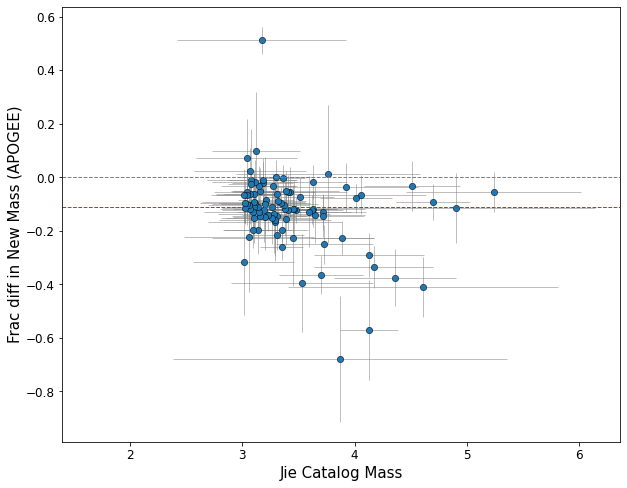

In [56]:
median_diff = np.nanmedian((adjusted_masses['a_corr_mass']-highmass_rc['ClcorM'])/highmass_rc['ClcorM'])
print('median diff',median_diff)

plt.scatter(highmass_rc['ClcorM'],(adjusted_masses['a_corr_mass']-highmass_rc['ClcorM'])/highmass_rc['ClcorM'],
            color='tab:blue',s=40,edgecolor='k',linewidth=0.5,label='APOGEE')
plt.errorbar(highmass_rc['ClcorM'],(adjusted_masses['a_corr_mass']-highmass_rc['ClcorM'])/highmass_rc['ClcorM'],
             xerr=highmass_rc['e_ClcorM'],yerr=adjusted_masses['a_corr_mass_e']/adjusted_masses['a_corr_mass'],
             linestyle='None',color='grey',zorder=0,alpha=0.5)
# plt.axline((3, 3), slope=1,color='grey',linestyle='--') 
plt.axhline(0,color='grey',linestyle='--')
plt.axhline(median_diff,color='tab:red',linestyle='--')
# plt.ylim(-0.25,0.1)
# plt.xlim(2.5,5)
# plt.legend()
plt.xlabel('Jie Catalog Mass')
plt.ylabel('Frac diff in New Mass (APOGEE)')
plt.show()

In [30]:
## What's the expected fractional difference in mass
print(np.sqrt((3*0.05)**2 + (4*0.02)**2 + ((3/2)*0.05))**2)
## roughly 5 percent?

0.10390000000000003


In [75]:
np.nanmedian(np.asarray(adjusted_masses['a_corr_mass_e'])/np.asarray(adjusted_masses['a_corr_mass']))

0.09131360052514398

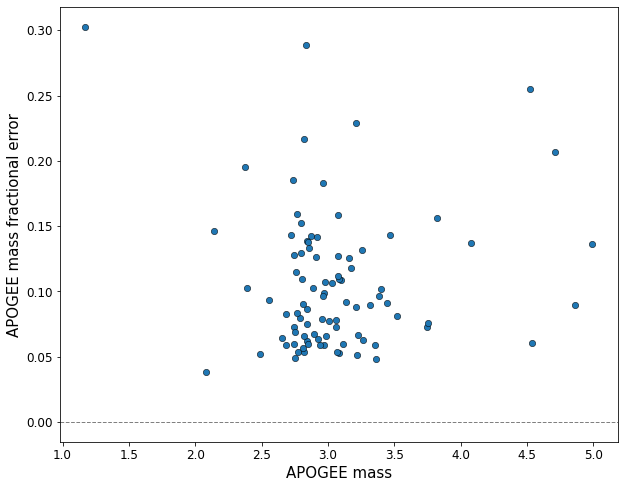

In [69]:
plt.scatter(adjusted_masses['a_corr_mass'],(adjusted_masses['a_corr_mass_e'])/adjusted_masses['a_corr_mass'],
            color='tab:blue',s=40,edgecolor='k',linewidth=0.5,label='APOGEE')
# plt.errorbar(highmass_rc['ClcorM'],(adjusted_masses['a_corr_mass']-highmass_rc['ClcorM'])/highmass_rc['ClcorM'],
#              xerr=highmass_rc['e_ClcorM'],yerr=adjusted_masses['a_corr_mass_e']/adjusted_masses['a_corr_mass'],
#              linestyle='None',color='grey',zorder=0,alpha=0.5)
# plt.axline((3, 3), slope=1,color='grey',linestyle='--') 
plt.axhline(0,color='grey',linestyle='--')
plt.xlabel('APOGEE mass')
plt.ylabel('APOGEE mass fractional error')
plt.show()

In [103]:
## mask for if apogee or lamost greater than value
target_mass = 3.1
mask = np.where(np.logical_or(adjusted_masses['a_corr_mass'] > target_mass,adjusted_masses['L_corr_mass'] > target_mass),True,False)

## mask for if no apogee or lamost data
mask2 = np.where(np.logical_and(np.logical_and(adjusted_masses['a_corr_mass']!=adjusted_masses['a_corr_mass'],
                                              adjusted_masses['L_corr_mass']!=adjusted_masses['L_corr_mass']),
                              adjusted_masses['j_corr_mass'] > target_mass),
                True,False)
## combine the masks
mask = mask | mask2
mask


# ## mask for if apogee greater than value
# mask = np.where(adjusted_masses['a_corr_mass'] > 3.0,True,False)
# mask

array([ True,  True,  True, False,  True,  True, False, False, False,
       False,  True,  True,  True,  True, False, False,  True,  True,
        True, False,  True,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False, False,  True, False, False,  True,  True, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False,  True, False,  True, False,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False])

In [104]:
adjusted_masses[mask]

KIC    a_fdnu a_uncorr_mass a_corr_mass a_corr_mass_e    L_fdnu  \
0     3347458  1.027232      4.484905     4.99376      0.680731       NaN   
1     8378545  1.025511      4.089198    4.522718      1.152732  1.032944   
2     5978324   1.02653      4.086504     4.53773      0.275641       NaN   
4     4756133  1.037179      4.201008    4.861471      0.436295       NaN   
5     7175316       NaN           NaN         NaN           NaN       NaN   
10    6599955       NaN           NaN         NaN           NaN   1.03482   
11    3955502  1.023045      3.720219    4.075189      0.558131  1.018294   
12    8037930       NaN           NaN         NaN           NaN       NaN   
13    8569885  1.025673      3.382724    3.743708      0.271784  1.026172   
16   11518639       NaN           NaN         NaN           NaN       NaN   
17    7988900  1.019913      3.534018    3.824026      0.598118       NaN   
18    8365782   1.01292      3.064524    3.225992      0.215503  1.001825   
20    9612933  1.012791      3.051905    3.211071      0.734022  1.012766   
21    7971558       NaN           NaN         NaN           NaN       NaN   
23   10094550  1.015826      3.177891    3.383886      0.327415       NaN   
24   10736390  1.015473      3.236866    3.441907      0.312929       NaN   
26    5564131       NaN           NaN         NaN           NaN  1.008564   
27    4370592  1.009081      2.990319     3.10043      0.336597       NaN   
28    5097690   1.02624      3.384167     3.75359      0.284288  1.025828   
29    9286851  1.012812      3.004294    3.161247      0.397002  1.020404   
30    6866251  1.018434      3.116325    3.352538      0.198346       NaN   
31    5106376   1.01446      3.213319    3.403253      0.346971  1.010029   
32    4562675       NaN           NaN         NaN           NaN  1.012612   
33    8525150       NaN           NaN         NaN           NaN       NaN   
35    9245283   1.01358      3.335069    3.519956      0.284772       NaN   
38    3120567  1.009876      2.941936    3.059889      0.240044  1.020232   
41    4940439  1.015101      3.263863    3.465518      0.496587  1.013064   
42    5307930  1.012499      3.108082    3.266415      0.205825  1.008505   
44    4348593  1.011861      3.108904    3.259049      0.428407       NaN   
48    8230626  1.017519      3.138188     3.36394      0.161478  1.020432   
56    4273491   1.00688      3.026756    3.110921      0.186207  1.008482   
58    9468199  1.014207      3.137092    3.319197      0.298421  1.015607   
62    4372082  1.008686      3.110136    3.219608      0.164956  1.011303   
70   10809272       NaN           NaN         NaN           NaN       NaN   
76   11456735  1.016362      2.938414    3.135505      0.287557       NaN   
78    9266192  1.035747      4.092484    4.709788      0.971943       NaN   
86   12020628       NaN           NaN         NaN           NaN       NaN   
88   10621713       NaN           NaN         NaN           NaN  1.017684   
90    8395466  1.019378      2.938584     3.17306      0.374837       NaN   
99    2845610  1.014661      2.903099    3.077132       0.48822  1.019847   
103   6382830  0.988806      2.483542    2.374193      0.464236  1.129433   
105   4651366  1.009338      3.092108    3.209238      0.282853       NaN   

    L_uncorr_mass L_corr_mass L_corr_mass_e    j_fdnu  ... j_corr_mass  \
0             NaN         NaN           NaN   1.03777  ...    5.423215   
1        4.151199    4.725861      1.198926  1.033902  ...    4.813188   
2             NaN         NaN           NaN   1.02697  ...    4.545511   
4             NaN         NaN           NaN  1.035632  ...    4.785084   
5             NaN         NaN           NaN  1.011674  ...    3.496303   
10       3.794413    4.351151      0.210526  1.011677  ...    3.604852   
11       3.645859    3.920056      0.532769  1.026942  ...    4.180413   
12            NaN         NaN           NaN  1.016173  ...    3.279109   
13       3.376886    3.744534   